# Clusteranalyse

Bei der Clusteranalyse, häufig auch einfach Clustern oder Clustering genannt, sucht man Gruppen von verwandten Objekten in einer Menge von Instanzen. Diese Gruppen nennt man auch Cluster. Betrachten wir das Beispiel in {numref}`fig-clust-example`. Auf der linken Seite sehen wir verschiedene Emoticons, unsere Objekte. Beim Clustern werden die Objekte jetzt in Gruppen unterteilt, in diesem Fall in zwei Gruppen: die glücklichen Emoticons und die traurigen Emoticons. Die Gruppen werden basierend auf den Merkmalen der Objekte bestimmt, andere Informationen stehen nicht zur Verfügung. Um die Trennung in glücklich und traurig zu erreichen, müssen diese Emotionen also von den Merkmalen repräsentiert werden. Wenn die Merkmale etwas anderes beschreiben würden, zum Beispiel die Farbe, würde das Ergebnis des Clusterns ein anderes sein: eine Trennung in gelbe und orange Emoticons. Wenn die Merkmale die Menge der Haare im Gesicht der Emoticons beschreiben würden, dann würde man die Emoticons ohne Bart von denen mit einem Schnauzer trennen. Auch wenn dies auf den ersten Blick offensichtlich erscheint, ist dieser Punkt extrem wichtig: Wenn die Merkmale nicht zur gewünschten Gruppierung passen, finden wir vielleicht trotzdem Gruppen, doch diese sind möglicherweise nicht sinnvoll für unseren Anwendungsfall.


```{figure} images/clustering_general.png
---
width: 600px
name: fig-clust-example
---
Gruppieren von Emoticons als Beispiel für das Clustern
```

Etwas abstrakter können wir Clustern wie in {numref}`fig-clust-abstract` beschreiben. Wir haben Objekte, für die wir mithilfe von einem Clusteralgorithmus eine sinnvolle Gruppierung suchen. Ohne die gefundenen Gruppen manuell zu analysieren, weiß man nicht, was die Gruppen repräsentieren und ob die Beziehung zwischen den Objekten wirklich sinnvoll ist.

```{figure} images/abstract_clustering_german.png
---
width: 600px
name: fig-clust-abstract
---
Konzept des Clusterings
```

Formal haben wir eine Menge von Objekten $O = \{object_1, object_2, ...\}$, die möglicherweise unendlich viele Elemente enthält. Außerdem haben wir eine Repräsentation der Objekte als Instanzen im Merkmalsraum $\mathcal{F} = \{\phi(o): o \in O\}$. Beim Clustern betrachtet man in der Regel numerische Merkmale, das heißt, jede Instanz ist ein reellwertiger Vektor und es gilt also $\mathcal{F} \subseteq \mathbb{R}^d$. Das Gruppieren der Objekte wird beschrieben durch eine Abbildung $c: \mathcal{F} \to G$, wobei $G =\{1, ..., k\}$ die Cluster sind und $k \in \mathbb{N}$ die Anzahl der Cluster. 

## Ähnlichkeitsmaße

Die Grundvoraussetzung, um ähnliche Objekte gruppieren zu können, ist, dass man ihre Ähnlichkeit messen kann. Beim Clustern ist der Ansatz hierfür, die Ähnlichkeit über den *Abstand* im Merkmalsraum zu messen. Je näher die Instanzen von Objekten einander sind, desto ähnlicher sind sie. Je weiter entfernt sie voneinander sind, desto verschiedener. Es gibt verschiedene Metriken, mit denen man Distanzen messen kann. In der Regel wird eine der folgenden drei Metriken verwendet.

Die mit großem Abstand üblichste Metrik ist der *euklidische Abstand*, den wir uns geometrisch als die direkte Verbindung zwischen zwei Punkten vorstellen können ({numref}`fig-euclidean`). Der euklidische Abstand wird über die euklidische Norm $||\cdot||_2$ definiert als

$$d(x,y) = ||y-x||_2 = \sqrt{(y_1-x_1)^2+...+(y_n-x_n)^2}.$$


```{figure} images/euclidean.png
---
width: 200px
name: fig-euclidean
---
Die euklidische Distanz als direkte Verbindung zweier Punkte
```

Ein weiteres verbreitetes Distanzmaß ist die *Manhattan-Distanz*. Der Ursprung des Namens ist darin begründet, dass diese Metrik ähnlich ist zu der Distanz, die man in Manhattan gehen muss, wenn man sich in den gitterartig angelegten Straßen bewegt. Da diese Straßen zum Großteil achsenparallel sind, kann man nicht diagonal gehen ({numref}`fig-manhatten`). Die Manhattan-Distanz wird über die Manhattan-Norm $||\cdot||_1$ definiert als

$$d(x,y) = ||y-x||_1 = |y_1-x_1|+...+|y_n-x_n|.$$

Der Einsatz der Manhattan-Distanz ist zum Beispiel bei sehr hochdimensionalen Daten sinnvoll, also bei Daten mit vielen Merkmalen. Hier gibt es die Tendenz bei der euklidischen Norm, dass alle Abstände ähnlich werden können. Außerdem ist die Manhattan-Norm robuster gegen Ausreißer bei einzelnen Merkmalen, da die Werte der Merkmale nicht vor dem Aufsummieren quadriert werden.

```{figure} images/manhatten.png
---
width: 200px
name: fig-manhatten
---
Die Manhattan-Distanz als Verbindung zweier Punkte, ohne sich diagonal bewegen zu können.
```

Der *Chebyshev-Abstand* ist auch als Maximumsmetrik bekannt und misst den maximalen Abstand in eine beliebige Richtung ({numref}`fig-chebyshev`). Der Chebyshev-Abstand wird über die Maximumsnorm $||\cdot||_\infty$ definiert als

$$d(x,y) = ||y-x||_\infty = \max_{i=1, ..., n} |y_i-x_i|.$$

Man sollte den Chebyshev-Abstand benutzen, wenn lediglich der maximale Abstand, den man bei den Merkmalen beobachtet, wichtig ist, nicht jedoch wie viele Merkmale sich unterscheiden. 

```{figure} images/chebyshev.png
---
width: 200px
name: fig-chebyshev
---
Der Chebyshev-Abstand als maximale Distanz in eine beliebige Richtung. Dies entspricht der Anzahl der Schritte, die ein König beim Schach bräuchte, um ein Feld zu erreichen.
```

## Städte und Häuser

Wir benutzen eine Analogie, um die Konzepte der Clusteralgorithmen zu erklären: Unsere Objekte sind Häuser und unsere Cluster sind Städte. Das Schöne an dieser Analogie ist, dass sie intuitiv plausibel ist. Man muss nicht wissen, zu welcher Stadt ein Haus gehört, um zu erkennen, welche weiteren Häuser zu dieser Stadt gehören. Man muss auch nicht wissen, wie viele Städte es gibt, um das zu erkennen. Es reicht, wenn man die Position der Häuser betrachtet. Das ist genau das Problem, das wir mit Clusteralgorithmen lösen wollen: Welche Objekte gehören zum gleichen Cluster und wie viele Cluster gibt es?

## $k$-Means-Algorithmus

Eine Variante, um Städte zu definieren, könnte mithilfe der Rathäuser erfolgen. Man könnte sagen, dass jedes Haus zu der Stadt gehört, deren Rathaus am nächsten liegt. Diese Idee ist die Essenz des $k$-Means-Algorithmus. Man beschreibt Cluster durch ihr *Zentrum*. Dieses Zentrum nennt man auch *Centroid*, weshalb es sich bei $k$-Means auch um einen Vertreter der *centroidbasierten Clusteralgorithmen* handelt.

Wenn man wissen möchte, zu welchem Cluster eine Instanz gehört, muss man lediglich herausfinden, welcher Centroid am nächsten ist. Das $k$ im Namen des Algorithmus steht für die Anzahl der Cluster. Formal haben wir die Centroids $C_1, ..., C_k$ und eine Metrik $d$, um den Abstand zu messen. Wir können für jede Instanz $x \in \mathcal{F}$ estimmen, zu welchem Cluster sie gehört, indem wir das Minimum bestimmen:

$$c(x) = \arg\min_{i=1,...,k} d(x, C_i)$$

bestimmen. 

Das folgende Beispiel zeigt, wie wir Daten in $k=4$ Cluster unterteilen. Die Centroids sind als große graue Punkte dargestellt, die anderen Farben zeigen die Clusterzugehörigkeit.

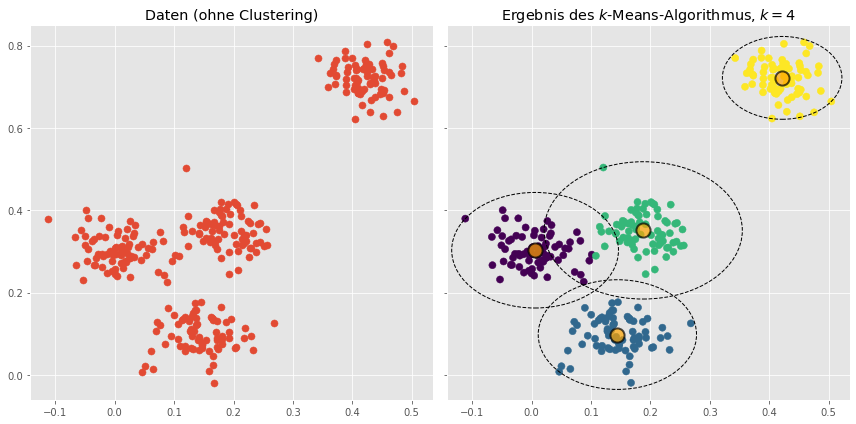

In [76]:
# we need matplotlib for plotting
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
# we use sklearn to generate data and for the clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate sample data, the _ means that we ignore the second return value
X, _ = make_blobs(
    n_samples=300, centers=4, center_box=(0, 1), cluster_std=0.04, random_state=1
)

# we fit a k-means model with four clusters
# then we predict for each point to which cluster it belong
# finally, we determine the location of the cluster centers
# n_init, init and random_state should usually not be set.
# we only use these parameters to make sure we have results
# that we can re-use later to demonstrate how the algorithm works
K = 4
kmeans = KMeans(n_clusters=K, n_init=1, init="random", random_state=8)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
max_distances = [
    np.max(np.sqrt(np.sum((X[y_kmeans == y_kmean] - center) ** 2, axis=1)))
    for y_kmean, center in zip(range(K), centers)
]

# now we plot the data and the clustering results
f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
axes[0].set_title("Daten (ohne Clustering)")
axes[0].scatter(X[:, 0], X[:, 1], s=50, marker="o")

axes[1].set_title(f"Ergebnis des $k$-Means-Algorithmus, $k={k}$")
# visualize the clusters
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)
# visualize the cluster centers
axes[1].scatter(
    centers[:, 0], centers[:, 1], c="orange", s=200, alpha=0.7, edgecolor="black", lw=2
)
for i, radius in enumerate(max_distances):
    axes[1].add_artist(plt.Circle(centers[i], radius, edgecolor="black", fill=False, linestyle="--", lw=1))
plt.tight_layout()
plt.show()


In [67]:
max_distances

[0.14036096155883312,
 0.13320687447006482,
 0.16677583996589257,
 0.10058891916439706]

Diese Darstellung der Cluster ist einfach, effektive und intuitiv. Der Nachteil dieser Darstellung von Clustern ist, dass dies nur mit zwei Merkmalen funktioniert. Wenn man mehr als zwei Merkmale hat, muss man entweder paarweise Scatterplots nutzen oder eine Technik wie die PCA einsetzen, um eine zweidimensionale Darstellung zu bekommen (siehe [Kapitel 4](kapitel_04)).

### Der Algorithmus

Ziel des Clusteralgorithmus ist es, die Positionen der Centroids zu bestimmen. Wenn wir uns wieder eine Stadt vorstellen, könnte man argumentieren, dass der Platz, an dem ein Rathaus gebaut werden soll, so gewählt werden sollte, dass der mittlere Abstand der Häuser zum Rathaus minimiert wird. Dann haben die Bewohner - im Mittel - den kürzesten Weg zum Rathaus. Jetzt stellen Sie sich vor, dass ein Neubaugebiet entsteht, außerdem werden an anderer Stelle ein paar alte Häuser abgerissen. Hierdurch ist der Ort des Rathauses nicht mehr optimal und idealerweise wird es neu gebaut, sodass der Abstand wieder minimiert wird. Hier ist die Analogie problematisch: Der Neubau eines Rathauses ist teuer, einen Centroid zu verschieben jedoch sehr einfach. Diese Idee ist also genau das, was der Algorithmus macht.

Seien $X \subseteq \mathcal{F}$ unsere Daten. Der $k$-Means-Algorithmus bestimmt die Cluster bzw. die Centroids durch folgenden iterativen Algorithmus:

1. Wähle die Startposition der Centroids $C_1, ..., C_k \in \mathcal{F}$.
2. Bestimme die Cluster $X_i = \{x \in X: c(x) = i\}$ für $i=1,...,k$. 
3. Verschiebe die Centroids, sodass der neue Ort des Centroids dem arithmetischen Mittel der Instanzen des Clusters entspricht: $C_i = \frac{1}{|X_i|} \sum_{x \in X_i} x$.
4. Wiederhole die Schritte 2 und 3, bis
   - das Ergebnis konvergiert, also sich die Cluster $C_1, ..., C_k$ nicht mehr verändern, oder
   - eine vorher festgelegte Höchstanzahl an Iterationen erreicht ist.

Auch wenn dieser Algorithmus relativ abstrakt klingt, wird schnell klar, wie er funktioniert, wenn wir uns die Schritte veranschaulichen.

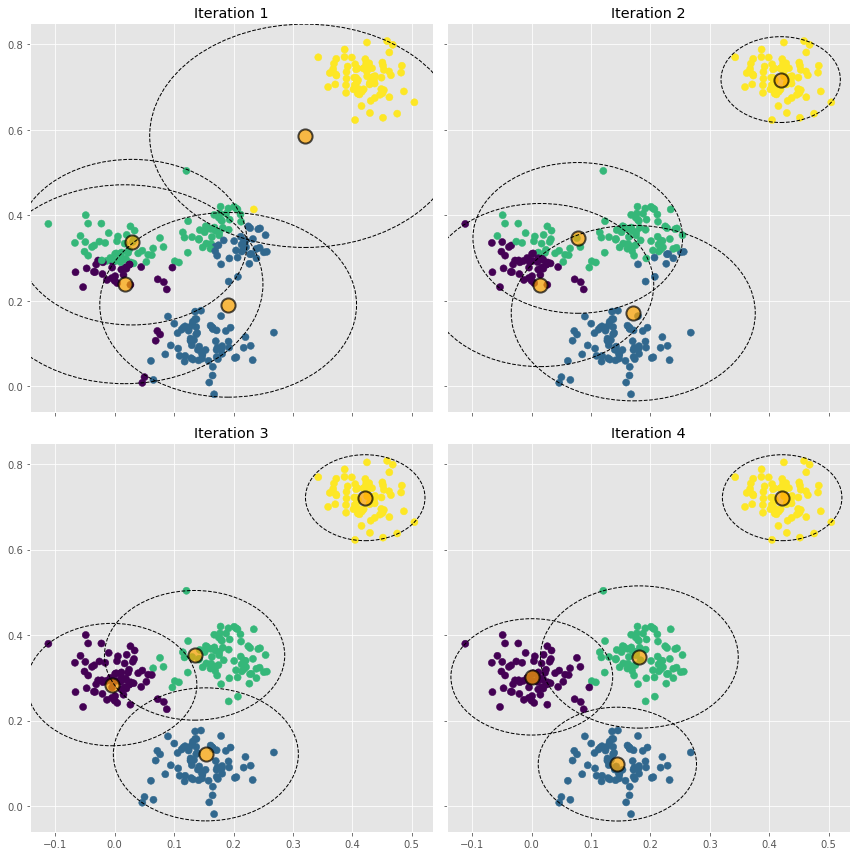

In [78]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 12))
axes = (
    axes.flatten()
)  # axes is a 2D array, which makes it difficult to get each axis, so we flatten it

# run the algorithm with k=1,...,4 iterations to demonstrate how it converges
K = 4
for iter in range(1, 5):
    kmeans = KMeans(
        n_clusters=K, max_iter=iter, n_init=1, init="random", random_state=8
    )
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    max_distances = [
        np.max(np.sqrt(np.sum((X[y_kmeans == y_kmean] - center) ** 2, axis=1)))
        for y_kmean, center in zip(range(k), centers)
    ]

    ax = axes[iter - 1]
    ax.set_title("Iteration %i" % iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)
    ax.scatter(
        centers[:, 0],
        centers[:, 1],
        c="orange",
        s=200,
        alpha=0.7,
        edgecolor="black",
        lw=2,
    )
    for i, radius in enumerate(max_distances):
        ax.add_artist(
            plt.Circle(
                centers[i], radius, edgecolor="black", fill=False, linestyle="--", lw=1
            )
        )

plt.tight_layout()


Im Detail passiert das Folgende:

- Iteration 1: Zuerst sehen wir den Startzustand mit zufällig gewählten Centroids und daher auch einer relativ zufälligen Aufteilung der Instanzen in Cluster. Ein Centroid befindet sich zwischen den Instanzen oben rechts und unten links. Dieser Centroid liegt am nächsten zu den gelb markierten Instanzen oben rechts sowie einer einzelnen Instanz. Ein weiterer Centroid liegt mittig in der unteren Hälfte der Daten und hat die blauen Instanzen zugewiesen bekommen. Außerdem gibt es noch zwei Centroids, die sich recht nah beieinander in der linken unteren Hälfte der Daten befinden und diese vertikal teilen: Der obere Centroid hat die grünen Instanzen, der untere die lila Instanzen. Die grünen Instanzen reichen bis in die Mitte der Daten.
- Iteration 2: Die Centroids werden entsprechend der ihnen zugewiesenen Instanzen verschoben, sodass sie basierend auf der Zuweisung aus Iteration 1 mittig liegen. Hierdurch bewegt sich der gelbe Centroid nach oben rechts in die Ecke, wo er auch für die weiteren Iterationen stabil bleibt. Der blaue Centroid bewegt sich etwas nach unten, da der Großteil der zugewiesenen Instanzen am unteren Rand der Daten liegt. Der grüne Centroid bewegt sich etwas nach rechts, da ihm einige Instanzen aus der Mitte zugewiesen wurden. Der lila Centroid bewegt sich zwar kaum, bekommt aber mehr Instanzen am linken Rand zugewiesen, da sich der grüne Centroid nach rechts bewegt hat.
- Iteration 3: Man sieht, wie das Ergebnis anfängt zu konvergieren. Der blaue Centroid liegt jetzt bereits zentral in der unteren mittleren Gruppe. Der grüne Centroid ist noch weiter nach rechts gewandert, sodass er bereits alle Instanzen in der mittleren Gruppe zugewiesen bekommt. Hierdurch hat der lila Centroid freies Spiel auf der linken Seite und bekommt die Instanzen in dieser Gruppe.
- Iteration 4: Nach nur vier Iterationen haben wir bereits ein sehr gutes Ergebnis und eine klare Trennung in vier Cluster.

### Bestimmen von $k$

Im obigen Beispiel haben wir $k=4$ benutzt, also nach vier Clustern gesucht. Wie man einen geeigneten Wert für $k$ bestimmt, haben wie noch offengelassen. Bevor wir uns im Detail damit befassen, betrachten wir erst einmal, wie sich das Ergebnis mit verschiedenen Werten für $k$ ändert.

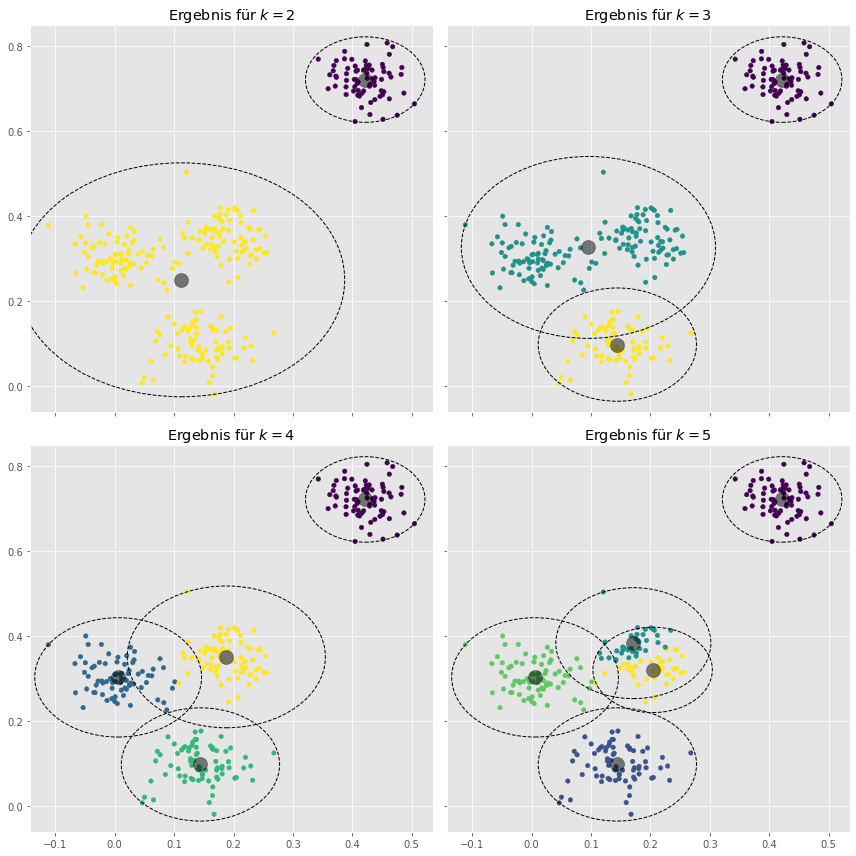

In [83]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 12))
axes = axes.flatten()

k = range(2, 6)
for iter in k:
    kmeans = KMeans(n_clusters=iter, random_state=2)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    max_distances = [
        np.max(np.sqrt(np.sum((X[y_kmeans == y_kmean] - center) ** 2, axis=1)))
        for y_kmean, center in zip(range(iter), centers)
    ]

    ax = axes[iter - 2]
    ax.set_title(f"Ergebnis für $k={iter}$")
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)
    for i, radius in enumerate(max_distances):
        ax.add_artist(
            plt.Circle(
                centers[i], radius, edgecolor="black", fill=False, linestyle="--", lw=1
            )
        )

plt.tight_layout()
plt.show()


Mit $k=2$ bekommen wir ein sehr großes Cluster und ein kleineres Cluster oben rechts. Mit $k=3$ zerfällt das große Cluster in zwei Gruppen, sodass wir ein Cluster oben rechts, ein Cluster in der Mitte und ein Cluster unten haben. Mit $k=4$ zerfällt das mittlere Cluster in zwei Gruppen, so wie wir es im Beispiel auch hatten. Mit $k=5$ zerfällt das Cluster in der Mitte in eine obere und eine untere Hälfte. Die Ergebnisse für $k=2, 3, 4$ sehen alle sinnvoll aus. Man kann argumentieren, dass $k=2$ ein gutes Ergebnis ist, da es eine große Lücke zwischen den Instanzen in der oberen Ecke und den anderen Daten gibt. Alle anderen Lücken sind kleiner. Man kann auch sagen, $k=3$ sei gut, da es sich bei den Daten in der Mitte auch um ein langgezogenes Cluster handeln könnte. Bei $k=4$ kann man argumentieren, dass alle Cluster eine ähnliche Anzahl von Daten und eine ähnliche Form haben, auch wenn einige Cluster recht nah beieinander liegen. Für $k=5$ findet man jedoch keine Begründung mehr, warum dieses Ergebnis besser sein könnte als die anderen: Die Trennung des mittleren Clusters in zwei Cluster ergibt einfach keinen Sinn.

Wichtig ist auch die Erkenntnis, dass verschiedene Clusterergebnisse und insbesondere auch die Anzahl von Clustern zu sinnvollen Ergebnissen führen können und oft nicht klar ist, welches Ergebnis das beste ist. Welches Ergebnis man favorisiert, hängt dann vom Anwendungsfall ab: Durch eine manuelle Analyse der Bedeutung der Cluster kann man verstehen, welche Gruppen die Cluster repräsentieren, und damit die Ergebnisse einordnen, um zu verstehen, welches Ergebnis am besten passt.

Beim $k$-Means-Algorithmus gibt es verschiedene Aspekte, die die Auswahl von $k$ beeinflussen:

- Das Domänenwissen über die Daten und den Anwendungsfall. Mithilfe des Domänenwissens kann man bewerten, ob die Daten innerhalb eines Clusters sich wirklich ähnlich sind oder auch ob sich verschiedene Cluster eventuell ähnlich sind. Wenn man bemerkt, dass die Daten innerhalb eines Clusters verschieden sind, ist das ein Indikator für die Erhöhung von $k$. Wenn man bemerkt, dass ähnliche Objekte in verschiedenen Clustern liegen, kann es helfen, $k$ zu reduzieren. Je nach Anwendungsfall kann es auch möglich sein, dass eine bestimmte Anzahl von Clustern gesucht wird. Wenn man zum Beispiel eine binäre Trennung der Daten in zwei Gruppen erreichen möchte, ist durch den Anwendungsfall $k=2$ bereits vorgegeben.
- Visualisierungen sind ein mächtiges Werkzeug, um zu erkennen, wie gut die Cluster die Daten gruppieren, wie die Daten innerhalb eines Clusters verteilt sind und ob es klar erkennbare Lücken zwischen den Clustern gibt. Visualisierung ist zum Beispiel auch das Werkzeug, mit dem wir im obigen Beispiel verschiedene Werte von   beurteilt haben.

Es gibt auch einen analytischen Ansatz, um $k$ zu bestimmen, der auf der *Within-Sum-of-Squares* (WSS) basiert. Um zu verstehen, was WSS ist, müssen wir uns noch einmal an die Grundlagen des Algorithmus erinnern. Die Centroids werden in jeder Iteration so aktualisiert, dass sie das arithmetische Mittel der Daten in dem Cluster sind. Das bedeutet automatisch auch, dass die *Varianz* innerhalb eines Clusters vom Centroid minimiert wird. Die Varianz ist das Quadrat der Standardabweichung und kann berechnet werden, indem man die Summe der quadratischen Distanzen vom arithmeti-schen Mittel bildet. Da der Centroid auf das arithmetische Mittel gesetzt wird, minimiert die Aktualisierung der Position des Centroids also die *Summe der Quadrate* (Sum-of-Squares) *innerhalb* (Within) eines Clusters. Entsprechend ist WSS nichts anderes als ein Maß dafür, wie gut es gelingt, die Varianz innerhalb eines Clusters zu miniminieren und ist definiert als

$$WSS = \sum_{i=1}^k\sum_{x \in X_i} d(x, C_i)^2.$$

Wir haben oben bereits anhand der Visualisierung diskutiert, wie gut verschiedene Werte von $k$ sind. Da es für zufällig generierte Daten kein Domänenwissen gibt, können wir dies auch nicht nutzen, um die Cluster zu bewerten. Wir können verschiedene Werte von $k$ jedoch mithilfe der WSS bewerten. Hierzu zeichnet man am besten ein einfaches Liniendiagramm, das die WSS für verschiedene Werte von $k$ vergleicht.

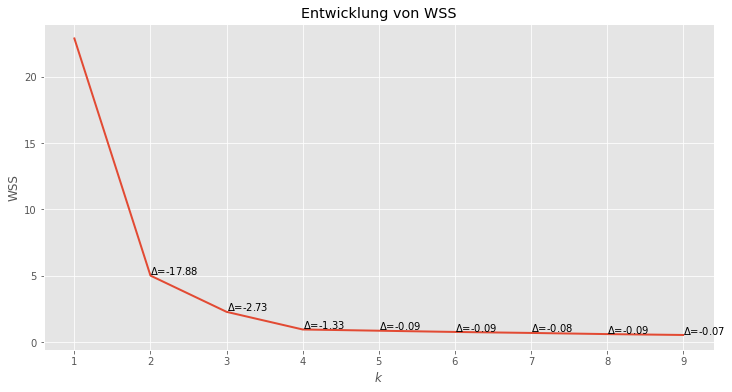

In [169]:
# sklearn calls the WSS inertia
inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(n_clusters=iter, random_state=2)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ )

inertia_diff = np.diff(inertia)
fix, ax = plt.subplots(figsize=(12,6))
ax.set_title("Entwicklung von WSS")
plt.plot(k, inertia, lw=2)
for i, diff in enumerate(inertia_diff, start=2):
    plt.annotate(text=f"$\Delta$={round(diff, 2)}", xy=(i, inertia[i-1]), xytext=(0, 1), textcoords="offset points")
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

Wie man sieht, gibt es einen starken Abfall der WSS von 2 nach 3 und von 3 nach 4. Ab 4 bleibt die WSS nahezu konstant. Außerdem sieht man, dass sich die Steigung bei den Werten 2, 3 und 4 stark ändert und die Kurve langsam abflacht. Diese Änderungen der Steigung nennt man auch *Ellenbogen* bzw. *Elbows*, da sie ein wenig dem Ellenbogen eines gebeugten Arms ähneln. Wenn wir die WSS nutzen, um $k$ auszuwählen, finden wir geeignete Werte an diesen Ellenbogen. Der Grund liegt darin, dass wenn sich die Kurve nicht abflacht, sondern weiter gleich steil abfällt, die Verbesserung auch gleich bleibt. Es gibt also keinen guten Grund, ein $k$ zu wählen, wo es keinen Ellenbogen gibt, da $k+1$ genauso so viel besser ist als $k$, wie $k$ als $k-1$.

Die WSS-Kurve fällt monoton ab. Das bedeutet das $WSS(k+1) \leq WSS(k)$ für alle $k>1$. Daher kann man $k$ auch leider nicht als das Minimum der WSS auswählen, da dies einfach bei $k=|X|$ erreicht wird. Der Grund dafür ist, dass die Varianz sich reduziert, wenn wir mehr Cluster hinzufügen. Das Minimum wird erreicht, wenn $d(x, C_{c(x)})=0$ für alle $x \in X$. Unter der Annahme das es keine Instanzen mit identischen Werten gibt, braucht man also $|X|$ Cluster um das Minimum zu erreichen. Wie man in der obigen Grafik aber sieht, wird der Abfall der WSS schon deutlich früher sehr klein, im Beispiel bei $k=4$. Entsprechend kann man $k$ gut durch eine visuelle Analyse der WSS auswählen, nicht jedoch durch einen Automatismus der die WSS minimiert. 

### Probleme des $k$-Means-Algorithmus

Obwohl das Konzept des $k$-Means-Algorithmus relativ einfach ist, bekommt man häufig gute Ergebnisse. Es gibt jedoch einige Probleme mit $k$-Means, die man kennen sollte. 

- $k$-Means ist sensitiv bezüglich der Auswahl der Startcentroids. Je nachdem wie die Centroids gewählt werden, kann es andere Clusterergebnisse geben. Man sagt dann, dass das Ergebnis nicht stabil ist. Entsprechend sollte man $k$-Means mehrfach mit verschiedenen Startcentroids ausführen. Wenn das Ergebnis instabil ist, ist das ein Indikator dafür, dass die Anzahl der Cluster eventuell anders gewählt werden sollte.
- Ein schlechter Wert von $k$ liefert möglicherweise schlechte Ergebnisse. Da man $k$ manuell auswählen muss, sollte man die nötige Erfahrung mit dem Algorithmus haben, damit man $k$ gut auswählen kann, um schlechte Ergebnisse zu vermeiden.
- Alle Merkmale sollten einen ähnlichen Wertebereich haben, im Idealfall sogar denselben. Andernfalls können die Unterschiede im Wertebereich zu einer ungewollten Gewichtung der Merkmale führen. Betrachten wir hierfür ein Beispiel mit zwei Merkmalen: Alter in Jahren und das Bruttojahreseinkommen in Euro. Das Alter ist (grob) zwischen 0 und 100, das Einkommen in Euro ist selbst bei Minijobs schon bei $12\cdot 450=5.400$ Euro, kann aber auch im sechsstelligen Bereich liegen. Das heißt, dass wenn man die Abstände zwischen zwei Instanzen berechnet, das Alter irrelevant ist. Alles, was zählt ,ist das Einkommen, da hier die Abstände deutlich größer sind. Der höhere Wertebereich sorgt also dafür, dass das Einkommen stärker gewichtet wird.
- Weil die Cluster basierend auf der Distanz zugewiesen werden, tendieren die Cluster dazu, rund zu sein. Wenn die Cluster nicht rund sind, kann man sie häufig auch nicht gut durch Centroids beschreiben. Ein Beispiel dafür sind die zwei Halbmonde, die wir unten sehen. Man kann klar erkennen, dass es sich um zwei Halbkreise handelt, jeder sollte ein Cluster sein. $k$-Means kann diese Cluster aufgrund ihrer Form nicht finden.

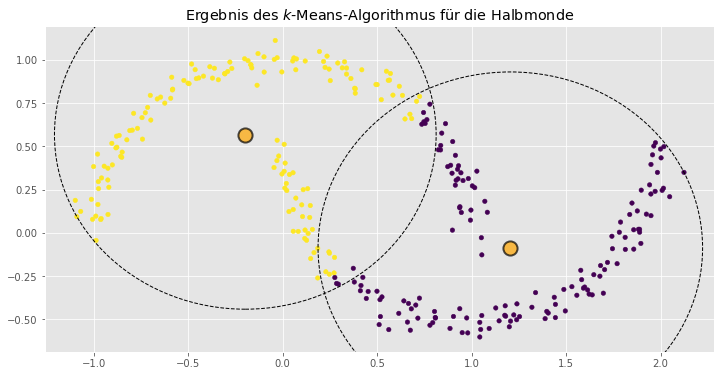

In [89]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# this generates our halfmoon data
X,_ = make_moons(n_samples=300, noise=0.05, random_state=0)

K = 2
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
max_distances = [
    np.max(np.sqrt(np.sum((X[y_kmeans == y_kmean] - center) ** 2, axis=1)))
    for y_kmean, center in zip(range(K), centers)
]

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Ergebnis des $k$-Means-Algorithmus für die Halbmonde')
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
ax.scatter(centers[:, 0], centers[:, 1], c='orange', edgecolor="black", s=200, alpha=0.7, lw=2);
for i, radius in enumerate(max_distances):
    ax.add_artist(
        plt.Circle(
            centers[i], radius, edgecolor="black", fill=False, linestyle="--", lw=1
        )
    )

plt.show()

## EM-Clustering

Wir könnten uns Städte auch als Zufallsvariablen vorstellen und die Häuser wären dann Instanzen dieser Zufallsvariablen. Die Zuweisung von Häusern zu Städten würde also von Wahrscheinlichkeitsverteilungen abhängen. Dies ist die Idee hinter einer Verallgemeinerung des $k$-Means-Algorithmus, die wir jetzt betrachten wollen. Unsere Rathäuser sind immer noch das Zentrum der Stadt. Aber wir berücksichtigen, dass Häuser, die sehr nah am Rathaus liegen, mit einer höheren Wahrscheinlichkeit zur Stadt gehören als solche, die weiter weg liegen. Wenn wir das weiterdenken, kann man dies zu einer Eigenschaft der Städte werden lassen: Es gibt Städte, die sich nicht sehr stark räumlich ausbreiten, und andere Städte, die eine große Fläche einnehmen. Wir wollen also die *Verteilung* der Häuser berücksichtigen. Daher nennt man diese Art zu Clustern auch *verteilungsbasiertes Clustern* (engl. *distribution-based clustering*).

Formal haben wir eine Anzahl von Clustern $k$, die durch Zufallsvariablen $C_1, ..., C_k$ beschrieben werden. Wir können die Wahrscheinlichkeit, dass eine Instanz $x \in \mathcal{F}$ zu einem Cluster $C_i$ gehört, als $P(C_i = x), i=1, ..., k$ berechnen. Jede Instanz hat also eine gewisse Wahrscheinlichkeit, zu jedem Cluster zu gehören. Da man aber trotzdem für jede Instanz wissen möchte, zu welchem Cluster sie jetzt gehört, kann man das *wahrscheinlichste* Cluster berechnen, also das Cluster $C_i$, das $P(C_i = x)$ maximiert. Entsprechend ist die Zuweisung der Instanzen zu Clustern definiert als

$$c(x) = \max_{i=1,..., k} P(C_i = x).$$

Auch wenn man das Konzept des EM-Algorithmus (EM - Expectation Maximization) mit beliebigen Verteilungen benutzen kann, benutzt man in der Regel normalverteilte Zufallsvariablen, um die Cluster zu beschreiben. Man spricht daher auch vom *Gaussian Mixture Model*. Diese Normalverteilungen sind *multivariat*, es wird also nicht nur eine einzelne Dimension beschrieben. Die Normalverteilung hat so viele Dimensionen, wie es Merkmale gibt. Eine univariate Normalverteilung kann man durch das arithmetische Mittel und die Standardab-weichung darstellen. Eine multivariate Normalverteilung wird durch einen Vektor von Mittelwerten und eine *Kovarianzmatrix* beschrieben. Die Kovarianz-matrix gibt die Beziehung zwischen den Varianzen der einzelnen Dimensionen an. Vereinfacht gesagt, kann man sich die Kovarianz als die Ausdehnung der Glockenform der Normalverteilung in die verschiedenen Richtungen vorstellen. Mathematisch betrachtet handelt es sich bei der Kovarianz um eine Ellipse: Die Form der Ellipse bestimmt die erwartete Abweichung der Daten in jede Richtung. Eine wichtige Eigenschaft der Kovarianzmatrix, die wir später noch brauchen, ist, dass es sich um quadratische Matrix handelt, bei der das obere rechte und das untere linke Dreieck symmetrisch sind. Es gibt also $\frac{d\cdot(d+1)}{2}$ freie Parameter in der Kovarianzmatrix. Wenn wir also $d$ Merkmale haben, gibt es $d+\frac{d\cdot(d+1)}{2}$ Parameter, die wir benötigen, um eine entsprechende multivariate Normalverteilung zu beschreiben: $d$ Mittelwerte und $\frac{d\cdot(d+1)}{2}$ Parameter für die $d \times d$-Kovarianzmatrix. Insgesamt haben wir also $k \cdot (d+\frac{d\cdot(d+1)}{2})$ Parameter, wenn wir $k$ Cluster beschreiben wollen. 

Wir betrachten jetzt die gleichen Daten wie eben, nur dass wir uns das Ergebnis des EM-Clustering mit $k=4$ Normalverteilungen anschauen. Die Mittelwerte sind als große graue Punkte markiert, die Kovarianzen als Ellipsen in der Farbe der jeweiligen Cluster.

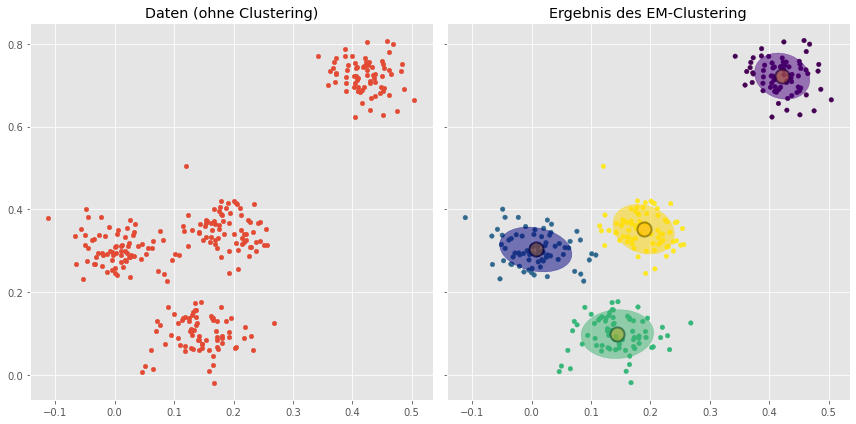

In [144]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# we silence some annyoing warnings
# if something is not working properly, remove this part and restart the kernel
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# this code is for plotting the elipses
def make_ellipses(gmm, ax):
    for cluster in range(gmm.n_components):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[cluster][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[cluster][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[cluster]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[cluster, :2], v[0], v[1], 180 + angle, color=colors[cluster]
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

colors = ['indigo', 'navy', 'mediumseagreen', 'gold']

X, y_true = make_blobs(n_samples=300, centers=4, center_box=(0,1),
                       cluster_std=0.04, random_state=1)

K = 4
em = GaussianMixture(n_components=K, random_state=2)
em.fit(X)
y_em = em.predict(X)
centers = em.means_

f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))

axes[0].set_title('Daten (ohne Clustering)')
axes[0].scatter(X[:, 0], X[:, 1], s=20);

axes[1].set_title('Ergebnis des EM-Clustering')
axes[1].scatter(X[:, 0], X[:, 1], c=y_em, s=20)
axes[1].scatter(centers[:, 0], centers[:, 1], c='orange', edgecolor="black", lw=2, s=200, alpha=0.7);
make_ellipses(em, axes[1])

plt.tight_layout()
plt.show()

Auch wenn die Beschreibung der Cluster durch Zufallsvariablen komplexer ist als durch Centroids, sieht man in der obigen Grafik den Vorteil: Die Kovarianzen erlauben es, die Verteilung der Daten in die Clusterbeschreibung mit aufzunehmen. Wir haben also mehr Informationen über die Daten als Teil der Clusterbeschreibung. 

### Der Algorithmus

Man nennt diese Art zu clustern EM-Clustering, weil sie auf dem *Expectation-Maximization-(EM-)Algorithmus* basiert. Der Algorithmus ist im Allgemeinen ähnlich zu $k$-Means: Wir starten mit einer zufälligen Initialisierung der Zufallsvariablen und verbessern die Beschreibung der Daten durch die Zufallsvariablen iterativ. Beim EM-Algorithmus müssen also für jedes Cluster die Mittelwerte und die Kovarianzmatrizen zufällig initialisiert und stückweise verbessert werden. Die Verbesserung basiert auf der Wahrscheinlichkeit (engl. *likelihood*), dass die Daten Instanzen dieser Zufallsvariablen sein könnten. Im Folgenden betrachten wir nicht die vollständige mathematische Beschreibung des EM-Algorithmus, sondern nur eine vereinfachte Version, in der wir die Mittelwerte aktualisieren und die Kovarianzen ignorieren.


1. Wähle zufällig $k$ Normalverteilungen $C_1 \sim (\mu_1, \Sigma_1), ..., C_k \sim (\mu_k, \Sigma_k)$, wobei $\mu_i \in \mathcal{F}$ die Mittelwerte und $\Sigma_i \in \mathcal{F}\times\mathcal{F}$ die Kovarianzmatrizen sind.
2. Expectation-Schritt: Bestimme die Gewichte $w_i(x) = \frac{p(x|\mu_i, \Sigma_i)}{\sum_{j=1}^k p(x|\mu_j, \Sigma_j)}$ für alle Instanzen $x \in X$ und Cluster $i=1, ..., k$.
3. Maximization-Schritt: Aktualisiere die Mittelwerte, sodass $\mu_i = \frac{1}{|X|}\sum_{x \in X} w_i(x)\cdot x$ für jedes Cluster $i=1, ..., k$. 
4. Wiederhole die Schritte 2 und 3, bis
   - das Ergebnis konvergiert, also sich die Cluster $C_1, ..., C_k$ nicht mehr verändern, oder
   - eine vorher festgelegte Höchstanzahl an Iterationen erreicht ist.

Der größte Unterschied zwischen dem EM-Algorithmus und dem $k$-Means-Algorithmus sind die Gewichte. Diese Gewichte geben die Wahrscheinlichkeit an, dass eine Instanz $x \in X$ zu einem bestimmten Cluster gehört. Der Wert $w_i(x)=0,9$ bedeutet also, dass die Instanz $x$ mit 90% Wahrscheinlichkeit zu Cluster $i$ gehört. Die Zuweisung der Instanzen zu den Clustern erfolgt nach der oben beschriebenen Regel: Jede Instanz wird dem Cluster zugewiesen, das die Wahrscheinlichkeit maximiert, also

$$c(x) = \arg\max_{i=1, ..., k} w_i(x).$$

Durch die Berechnung der Wahrscheinlichkeit für jedes Cluster kann man beim EM-Clustering die Unsicherheit der Ergebnisse gut nachvollziehen. Wenn eine Instanz für verschiedene Cluster eine hohe Wahrscheinlichkeit hat, erkennt man, dass diese Zuweisung unsicher ist. Diese Art zu clustern nennt man auch *Soft Clustering*, da die Instanzen nicht “hart” genau einem Cluster zugewiesen werden, sondern stattdessen eine “weiche” Zuweisung über Wahrscheinlichkeiten erfolgt.

Um ein tieferes Verständnis für den EM-Algorithmus zu bekommen, betrachten wir jetzt an einem Beispiel, wie die Cluster aktualisiert werden.

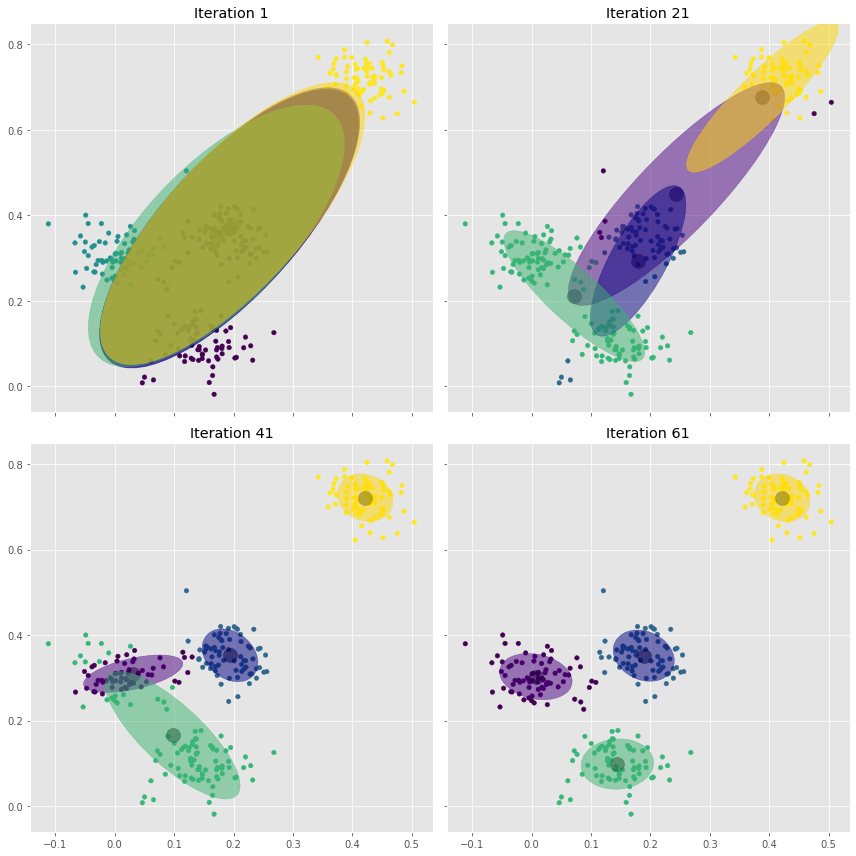

In [145]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 12))

for iter in range(0,4):
    cur_iter = iter*20+1
    em = GaussianMixture(n_components=4,random_state=5, max_iter=cur_iter, init_params='random')
    em.fit(X)
    y_em = em.predict(X)
    centers = em.means_
    ax = axes[min(1,max(0, iter-1)), (iter)%2]
    ax.set_title('Iteration %i' % cur_iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_em, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    make_ellipses(em, ax)

plt.tight_layout()
plt.show()

Im Detail passiert Folgendes:

- Iteration 1: Wir starten mit vier Normalverteilungen, die nahezu identisch sind. Der Mittelwert liegt in der Mitte der Daten und die Kovarianzen sind in der Diagonale verlängerte Ellipsen, die sich geringfügig voneinander unterscheiden. Man sieht zum Beispiel, dass die grüne Ellipse etwas weiter nach links unten geht und die gelbe etwas weiter nach rechts oben. Dies spiegelt sich auch schon in der Zuweisung der Instanzen zu den Clustern wider: Links unten ist das grüne Cluster, rechts oben das gelbe, die anderen Farben sind kaum zu erkennen aufgrund der Überschneidung.
- Iteration 21: Nach 21 Iterationen sieht man schon, wie sich die Normalverteilungen voneinander trennen. Die gelbe Verteilung wird nach rechts oben gezogen, hat aber immer noch eine sehr große Kovarianzellipse. Die grüne wurde zwischen die Instanzen links und unten gezogen. Die blaue liegt in der Mitte der Daten, hat jedoch jetzt eine deutlich kleinere Kovarianz. Die lila Verteilung hat sich kaum bewegt und die Kovarianz ist immer noch sehr hoch.
- Iteration 41: Man sieht, wie die Verteilungen langsam gegen ihre Ziele konvergieren. Die gelbe Verteilung liegt jetzt fest rechts oben in der Ecke und hat sich dort an die Instanzen angepasst. Die Kovarianz der blauen Verteilung ist auch weiter geschrumpft, sodass diese jetzt nur noch die Instanzen in der Mitte überdeckt. Hierdurch wurde die bisher noch "unentschlossene" lila Verteilung nach links gedrückt, wo sie dank einer relativ kleinen Kovarianz anfängt, die grüne Verteilung zu dominieren. Als Konsequenz beginnt die grüne Verteilung, sich zu den Instanzen am unteren Rand zu bewegen.
- Iteration 61: Die Cluster sind konvergiert: Die lila Verteilung ist jetzt fest bei den Instanzen links und die grüne ist vollständig nach unten gewandert.

Im Beispiel erkennt man zwei wichtige Eigenschaften des EM-Clustering. Zum einen konvergiert der Algorithmus deutlich langsamer als $k$-Means. Dies liegt daran, dass mehr Parameter optimiert werden müssen, also nicht nur die Mittelwerte, sondern auch die Kovarianzen. Außerdem bremst das Soft Clustering die Konvergenz: Hierdurch bewegen sich die Mittelwerte nur langsam, da sie auch von anderen Instanzen, die eigentlich schon anderen Clustern zugeordnet werden, noch angezogen werden, wenn auch schwächer. Zum anderen sieht man, dass die Cluster möglicherweise keine zusammenhängende Region beschreiben. In Iteration 41 gibt es einige grüne Instanzen am linken Rand, der Rest befindet sich unten. Dazwischen liegen Instanzen, die dem lila Cluster zugeordnet sind. Es gibt also zwei getrennte Regionen im grünen Cluster. Diese Trennung wird durch die Form der Kovarianzmatrizen ermöglicht. Da die Kovarianz der grünen Verteilung größer ist, haben Instanzen, die weit weg vom Mittel liegen, noch eine relativ hohe Wahrscheinlichkeit, zur grünen Verteilung zu gehören. Die Kovarianz der lila Verteilung ist deutlich kleiner, sodass die Wahrscheinlichkeit mit der Distanz stärker abnimmt. Derart getrennte Regionen sind ungewöhnlich und mit den meisten Clusteralgorithmen gar nicht möglich. Beim  $k$-Means-Algorithmus ist dies zum Beispiel ausgeschlossen, da sich die Distanz für jeden Centroid in alle Richtungen gleich verändert.

> **Bemerkung:**
>
> Die Gemeinsamkeiten des $k$-Means-Algorithmus und des EM-Clustering gehen noch über die obige Beschreibung hinaus. Genau genommen ist $k$-Means nur ein Spezialfall des EM-Clustering in dem Voronoi-Zellen [^voronoi] zur Modellierung der Wahrscheinlichkeiten genutzt werden. 

### Bestimmen von $k$

Genau wie beim $k$-Means-Clustern muss auch beim EM-Clustern die Anzahl der Cluster durch den Benutzer vorgegeben werden. Der Ansatz ist ähnlich: Domänenwissen und Visualisierungen sind auch hier gute Mittel, um $k$ zu bestimmen.

[^voronoi]: https://mathworld.wolfram.com/VoronoiDiagram.html

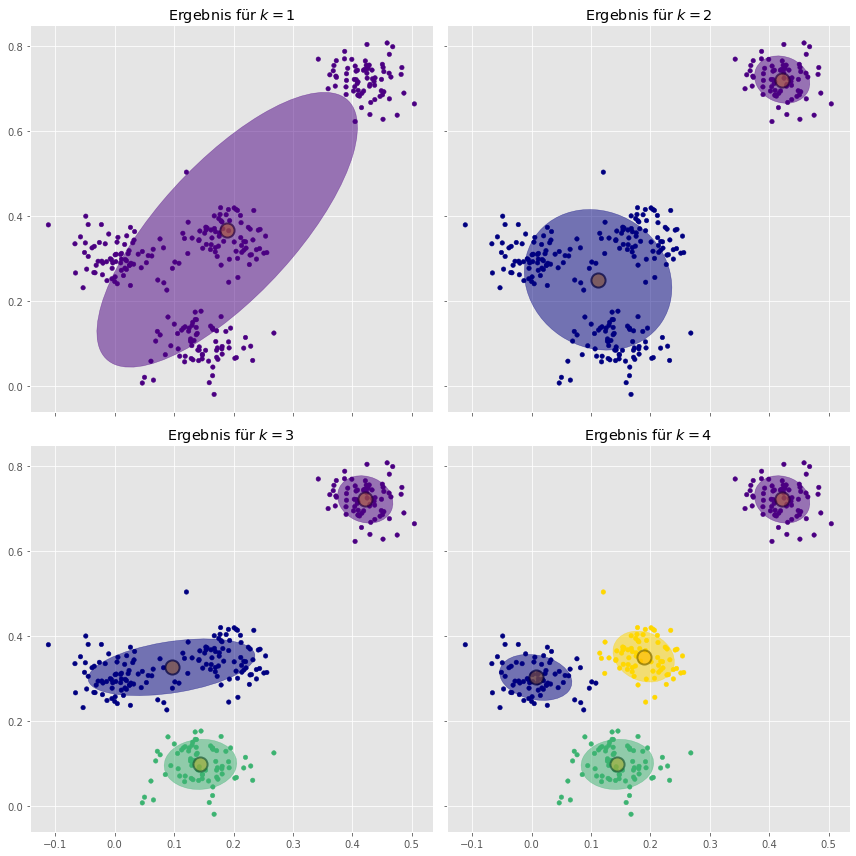

In [154]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 12))
axes = axes.flatten()

for iter in range(1,5):
    em = GaussianMixture(n_components=iter,random_state=2)
    em.fit(X)
    y_em = em.predict(X)
    centers = em.means_
    ax = axes[iter-1]
    ax.set_title('Ergebnis für $k=%i$' % iter)
    # we use a bit of an indirect way to define the colors, because they
    # otherwise sometimes did not match with the ellipses
    ax.scatter(X[:, 0], X[:, 1], c=[colors[y] for y in y_em], s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='orange', edgecolor="black", lw=2, s=200, alpha=0.7);
    make_ellipses(em, ax)
    
plt.tight_layout()
plt.show()

Man kann gut erkennen, dass eine einzelne Normalverteilung nicht ausreicht, um die Daten zu beschreiben. Die Ergebnisse für $k=2, 3, 4$ sind besser. Man sieht jedoch, dass nur für $k=4$  die Verteilung der Instanzen innerhalb der Cluster wirklich der Form der Kovarianzellipsen entspricht, was dafür spricht, dass dies das beste Ergebnis ist.

Es gibt auch einen analytischen Ansatz für die Bestimmung von $k$ basierend auf dem *Bayesian Information Criterion* (BIC). Ähnlich wie bei WSS ist BIC auch ein Maß dafür, wie gut der Algorithmus sein Optimierungsziel erreicht. Der EM-Algorithmus probiert, die Wahrscheinlichkeit des Ergebnisses zu maximieren. Formal macht man das mit der *Likelihood-Funktion* $\hat{L}(C_1, ..., C_k; X)$, die wir bei der Beschreibung des EM-Algorithmus ausgespart haben und auch hier nicht im Detail definieren wollen. Der Wert der Likelihood-Funktion wird höher, wenn die Cluster eine bessere Erklärung für die Daten sind. Ähnlich zum monotonen Abfall der WSS ist auch die Likelihood-Funktion in der Regel monoton: Mit mehr Clustern bekommt man einen höheren Wert. BIC wird jedoch nicht nur über die Likelihood-Funktion berechnet. Zusätzlich wird die Komplexität des berechneten Modells für die Cluster berücksichtigt. Zu Beginn des Kapitels haben wir bereits gezeigt, dass man $k' = k \cdot (d+\frac{d\cdot(d+1)}{2})$ Parameter braucht, um $k$ Cluster für $d$ Merkmale durch multivariate Normalverteilungen zu beschreiben. Ockhams Rasiermesser besagt, dass die einfachste Erklärung meistens die beste ist [^occam]. Das bedeutet hier, dass wenn man einen ähnlichen Wert der Likelihood-Funktion mit weniger Parametern erreichen kann, man dieses kleinere Modell verwenden sollte. Komplexere Beschreibungen, also mehr Parameter, die aber die Likelihood-Funktion nur noch wenig verbessern, könnten hingegen Overfitting sein. Auf Grundlage dieser Konzepte ist BIC definiert als

$$BIC = \log(|X|)\cdot k' - 2\cdot \log(\hat{L}(C_1, ..., C_k; X)).$$

BIC wird also größer mit mehr Parametern und mehr Trainingsdaten und fällt ab, wenn sich die Likelihood-Funktion verbessert. Daher sollte man probieren, den BIC zu minimieren. Im Vergleich zu WSS ist BIC nicht monoton, sondern es gibt ein Minimum. Dies ist möglich, da BIC die Modellkomplexität bestraft. Ab einem gewissen Punkt ist die Strafe für ein komplexeres Modell größer als die Verbesse-rung der Likelihood-Funktion und das Minimum ist erreicht. Hieraus folgt, dass es basierend auf BIC sogar eine *optimale* Anzahl von Clustern gibt, die man automatisch als den Wert von $k$, bei dem BIC minimiert wird, bestimmen kann. Auch das können wir uns am Beispiel anschauen.

[^occam]: https://doi.org/10.1007/978-1-4899-7687-1_614

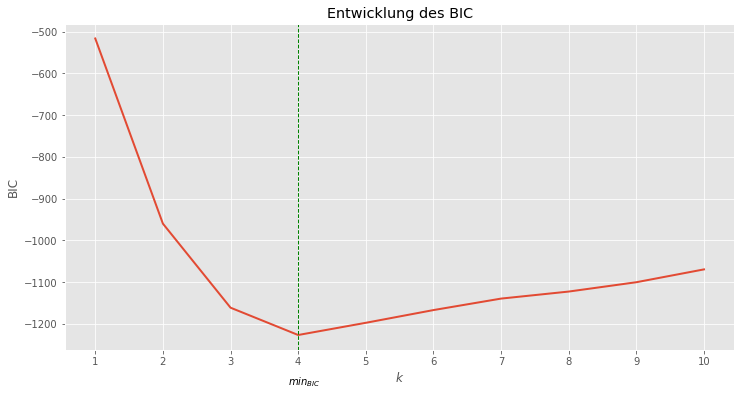

In [188]:
ks=range(1,11)
bic = []
for k in ks:
    em = GaussianMixture(n_components=k,random_state=2)
    em.fit(X)
    y_em = em.predict(X)
    centers = em.means_
    bic.append(em.bic(X))

x_min = np.argmin(bic)
plt.figure(figsize=(12,6))
plt.title("Entwicklung des BIC")
plt.plot(ks, bic, lw=2)
plt.axvline(x=x_min+1, linestyle="--", color="green", lw=1)
plt.annotate("$min_{BIC}$", (x_min+1, bic[x_min]), (-10, -50), textcoords="offset points")
plt.ylabel("BIC")
plt.xlabel("$k$")
plt.xticks(ks)
plt.show()

Das Minimum des BIC wird für $k=4$ erreicht. Dies bedeutet, dass vier Cluster der optimale Trade-off zwischen der Anzahl der Modellparameter und der Qualität der Cluster sind. Bitte beachten Sie, dass man die absoluten Werte des BIC ignorieren sollte (im Bild also die Werte der y-Achse). Ob BIC positiv oder negativ ist oder die Werte in der Größenordnung $10^2$ oder $10^5$ liegen, hängt eher von den Daten ab als von der Qualität der Ergebnisse. Entsprechend kann man sogar die Skala der y-Achse ausblenden, ohne wertvolle Informationen zu verlieren. 

> **Bermerkung:**
>
> BIC ist aus dem *Akitake Information Criterion* (AIC) abgeleitet, das als
>
> $$AIC = 2\cdot k' - 2\cdot \log(\hat{L}(C_1, ..., C_k; X))$$
> 
> definiert ist. Das AIC ist eine Folgerung aus der Kullback-Leibler-Divergenz, einem informationstheoretischem Maß für den Unterschied zwischen zwei Zufallsvariablen. Dies ist auch der Grund, warum der Logarithmus in der AIC-Definition und auch in der BIC-Definition verwendet wird. Der einzige Unterschied zwischen AIC und BIC ist der erste Term: Während das AIC einen festen Faktor von 2 hat, wird beim BIC die Modellkomplexität noch mit dem Logarithmus der Anzahl der Trainingsdaten gewichtet.

### Probleme des EM-Clustering

EM-Clustering löst zwei Probleme des $k$-Means-Algorithmus: Unterschiedliche Wertebereiche der Merkmale können durch die Kovarianzmatrizen berücksichtigt werden. Hierdurch lassen sich auch ellipsoide Cluster beschreiben, was mächtiger als die eher runde Form beim $k$-Means-Clustering ist. Die anderen Probleme des $k$-Means-Algorithmus hat man auch weiterhin mit dem EM-Clustering.

- EM-Clustering ist sensitiv bezüglich der Startwerte. Eine schlechte Startposition kann dazu führen, dass der Algorithmus nur sehr langsam konvergiert oder sogar ein schlechtes Ergebnis liefert. Ein guter Ansatz, das EM-Clustering zu initialisieren, ist es, die Centroids vom $k$-Means-Clustering als Startwerte für die Mittelwerte der Cluster zu nutzen.
- Die Wahl von $k$ kann zu schlechten Ergebnissen führen. Auch wenn das BIC ein guter Ansatz für die Auswahl von   ist, heißt es nicht zwingend, dass man ein gutes Ergebnis findet. Es könnte zum Beispiel möglich sein, dass man sehr viele Cluster bräuchte, um das Optimum des BIC zu erreichen. In diesem Fall sollte man BIC ähnlich wie WSS benutzen und stattdessen nach Ellenbogen bei einer kleineren Anzahl von Clustern suchen.
- EM-Clustering ist nur für Cluster, die sich durch Normalverteilungen beschreiben lassen, gut geeignet, was eine etwa ellipsoide Form der Cluster voraussetzt. Die Halbmonde könnten auch vom EM-Algorithmus nicht richtig gruppiert werden.

## DBSCAN

Bisher haben wir immer die Rathäuser als Referenzpunkt für die Definition von Städten benutzt. Wenn wir aus dem Fenster schauen, erkennen wir jedoch, dass die Nachbarhäuser zur gleichen Stadt gehören, auch ohne zu wissen, wo das Rathaus liegt. Das Gleiche gilt für die Nachbarn Ihrer Nachbarn usw. Im Endeffekt sind alle Ihre direkten oder indirekten Nachbarn Teil der gleichen Stadt. Dies ist die Grundidee des *dichtebasierten Clustering* (engl. *density-based clustering*).

Dieser Ansatz ist grundverschieden vom $k$-Means-Algorithmus und vom EM-Clustering, weil es keine Formel gibt, mit der man angeben kann, welche Instanzen zu einem Cluster gehören. Stattdessen beschreiben die Instanzen die Cluster: Wenn wir wissen wollen, welche Instanzen zum gleichen Cluster gehören, müssen wir uns die Nachbarschaften anschauen.

Der DBSCAN-Algorithmus (Density-Based Spatial Clustering of Applications with Noise) ist ein weitverbreiteter dichtebasierter Clusteralgorithmus. Auf unseren Beispieldaten liefert DBSCAN das folgende Ergebnis.

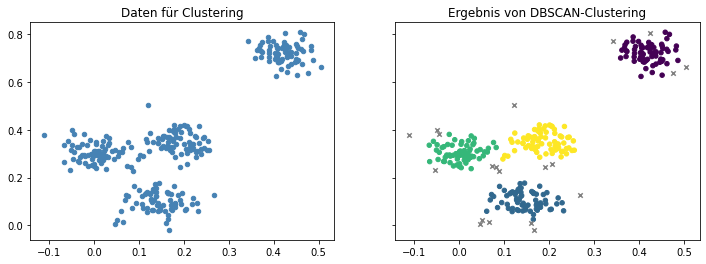

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

colors = ['indigo', 'navy', 'mediumseagreen', 'gold']

X, y_true = make_blobs(n_samples=300, centers=4, center_box=(0,1),
                       cluster_std=0.04, random_state=1)


dbscan = DBSCAN(eps=0.03, min_samples=4)
dbscan.fit(X)
# noise is marked with a negative value for the cluster number
noise_mask = dbscan.labels_<0

f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))

axes[0].set_title('Daten für Clustering')
axes[0].scatter(X[:, 0], X[:, 1], s=20, c='steelblue');

axes[1].set_title('Ergebnis von DBSCAN-Clustering')
axes[1].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[1].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')
plt.show()

Wir können dieselben vier Cluster wie auch bisher erkennen. Es gibt jedoch auch einige Instanzen die mit einem grauen Kreuz markiert sind. Diese Instanzen sind keinem Cluster zugeordnet und werden als *Rauschen* (engl. *noise*) identifiziert. Dies kann passieren, wenn es Instanzen gibt, die sich nicht in einer dichten Nachbarschaft befinden. In unserer Analogie sind das die Häuser, die sich außerhalb der Stadtgrenzen befinden, zum Beispiel ein Bauernhof an einer Landstraße. 

### Der Algorithmus

Der DBSCAN-Algorithmus basiert auf dem Konzept von *dichten Nachbarschaften*. Eine Nachbarschaft wird über die Distanz $\epsilon \in \mathbb{R}$ definiert, sodass die Nachbarn einer Instanz $x \in X$ definiert sind als $neighbors(x) = \{x' \in X: d(x, x') \leq \epsilon\}$. Eine Nachbarschaft heißt *dicht*, wenn sie mehr als $minPts \in \mathbb{N}$ Instanzen beinhaltet. Alle Instanzen, die eine dichte Nachbarschaft haben, nennt man *Kernpunkte* (engl. *core points*). Wir nutzen die Notation $core(C) = \{x \in X: |neighbors(x)| \geq minPts\}$, um alle Kernpunkte innerhalb eines Clusters $C \subseteq X$ zu beschreiben, und $core(X)$ für alle Kernpunkte.

Sobald man alle Kernpunkte bestimmt hat, kann man ein Cluster *wachsen* lassen. Hierzu wählt man einen beliebigen Kernpunkt aus und definiert, dass dieser Kernpunkt zum ersten Cluster gehört. Dann fügt man alle Nachbarn dem Cluster hinzu. Für alle Nachbarn, die ebenfalls Kernpunkte sind, wird dies wiederholt, bis man irgendwann alle Nachbarn von allen Kernpunkten im Cluster hat. Dann wählt man den nächsten Kernpunkt, der noch zu keinem Cluster gehört aus, und lässt das nächste Cluster wachsen.

1. Setze $i=1$ als aktuelle Nummer des Clusters. 
2. Wähle einen Kernpunkt aus, der noch keinem Cluster zugeordnet ist, um ein neues Cluster zu initialisieren, also $x \in core(X) \setminus \bigcup_{j_i} C_j$ und setze $C_i = \{x\}$.
3. Füge alle Nachbarn der Kernpunkte in $C_i$ dem Cluster hinzu, also $C_i = \bigcup_{x \in core(C_i)} neighbors(x)$.
4. Wiederhole Schritt 3, bis keine weiteren Instanzen mehr hinzugefügt werden. 
5. Falls es weitere Kernpunkte gibt, die noch keinem Cluster zugeordnet wurden, setze $i=i+1$ und gehe zurück zu Schritt 2. 

Die Arbeitsweise des Algorithmus können wir uns am Beispiel verdeutlichen.

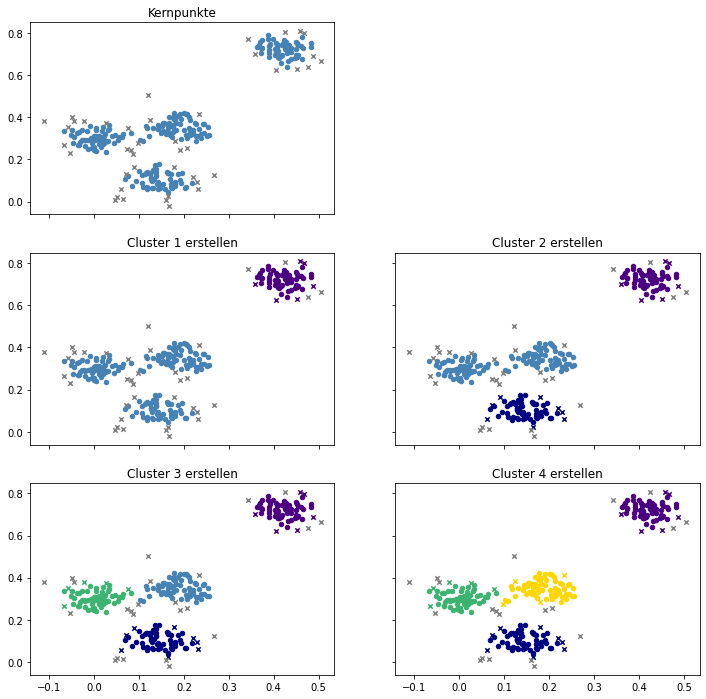

In [6]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

cluster_0_mask = dbscan.labels_==0
cluster_0_core_mask = cluster_0_mask & core_samples_mask
cluster_0_density_connected_mask = cluster_0_mask & ~core_samples_mask

cluster_1_mask = dbscan.labels_==1
cluster_1_core_mask = cluster_1_mask & core_samples_mask
cluster_1_density_connected_mask = cluster_1_mask & ~core_samples_mask

cluster_2_mask = dbscan.labels_==2
cluster_2_core_mask = cluster_2_mask & core_samples_mask
cluster_2_density_connected_mask = cluster_2_mask & ~core_samples_mask

cluster_3_mask = dbscan.labels_==3
cluster_3_core_mask = cluster_3_mask & core_samples_mask
cluster_3_density_connected_mask = cluster_3_mask & ~core_samples_mask

f, axes = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(12, 12))

ax = axes[0,0]
ax.set_title('Kernpunkte')
ax.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~core_samples_mask, 0], X[~core_samples_mask, 1], s=20, marker='x', c='Grey')

axes[0,1].axis('off')

ax = axes[1,0]
ax.set_title('Cluster 1 erstellen')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[~cluster_0_mask & core_samples_mask, 0], X[~cluster_0_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

ax = axes[1,1]
ax.set_title('Cluster 2 erstellen')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[cluster_1_core_mask, 0], X[cluster_1_core_mask, 1], s=20, c=colors[1])
ax.scatter(X[cluster_1_density_connected_mask, 0], X[cluster_1_density_connected_mask, 1], s=20, c=colors[1], marker='x')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

ax = axes[2,0]
ax.set_title('Cluster 3 erstellen')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[cluster_1_core_mask, 0], X[cluster_1_core_mask, 1], s=20, c=colors[1])
ax.scatter(X[cluster_1_density_connected_mask, 0], X[cluster_1_density_connected_mask, 1], s=20, c=colors[1], marker='x')
ax.scatter(X[cluster_2_core_mask, 0], X[cluster_2_core_mask, 1], s=20, c=colors[2])
ax.scatter(X[cluster_2_density_connected_mask, 0], X[cluster_2_density_connected_mask, 1], s=20, c=colors[2], marker='x')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

ax = axes[2,1]
ax.set_title('Cluster 4 erstellen')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[cluster_1_core_mask, 0], X[cluster_1_core_mask, 1], s=20, c=colors[1])
ax.scatter(X[cluster_1_density_connected_mask, 0], X[cluster_1_density_connected_mask, 1], s=20, c=colors[1], marker='x')
ax.scatter(X[cluster_2_core_mask, 0], X[cluster_2_core_mask, 1], s=20, c=colors[2])
ax.scatter(X[cluster_2_density_connected_mask, 0], X[cluster_2_density_connected_mask, 1], s=20, c=colors[2], marker='x')
ax.scatter(X[cluster_3_core_mask, 0], X[cluster_3_core_mask, 1], s=20, c=colors[3])
ax.scatter(X[cluster_3_density_connected_mask, 0], X[cluster_3_density_connected_mask, 1], s=20, c=colors[3], marker='x')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

plt.show()

Im Detail passiert Folgendes:

- Als Erstes werden alle Kernpunkte bestimmt. Diese Instanzen werden später in jedem Fall zu einem Cluster gehören, da sie sich in einer dichten Nachbarschaft befinden. 
- Anschließend wird das erste Cluster erstellt. Hierzu wird ein Kernpunkt ausgewählt, im Beispiel eine Instanz aus dem Bereich rechts oben. Alle Kernpunkte in dieser Region werden zu diesem Cluster hinzugefügt sowie auch alle Nachbarn der Kernpunkte, die nicht selbst Kernpunkte sind. Die mit einem lila Kreuz markierten Instanzen sind selbst keine Kernpunkte, befinden sich aber in der Nachbarschaft eines Kernpunkts und gehören daher dem Cluster an. Dies sind quasi die Häuser an der Stadtgrenze. Es gibt auch einige graue Kreuze in der Region rechts oben. Diese befinden sich nicht in der Nachbarschaft eines Kernpunkts und werden zu Rauschen.
- Anschließend wird ein neuer Kernpunkt gewählt, um das zweite Cluster zu initialisieren. In diesem Fall wurde eine Instanz im unteren Bereich ausgewählt. Es werden wieder alle Nachbarn hinzugefügt, einige Instanzen liegen in keiner Nachbarschaft und bleiben als Rauschen.
- Dies wird noch zwei Mal wiederholt, um die letzten beiden Cluster wachsen zu lassen.
- Da jetzt alle Kernpunkte einem Cluster zugewiesen wurden, terminiert der Algorithmus. Alle Instanzen, die jetzt noch mit einem grauen Kreuz markiert sind, sind Rauschen.

### Bestimmen von $\epsilon$ und $minPts$

Ein Vorteil von DBSCAN ist, dass wir die Anzahl der Cluster nicht selbst bestimmen müssen. Stattdessen werden diese vom Algorithmus auf Grundlage der Kernpunkte bestimmt. Wir müssen jedoch definieren, was eine (dichte) Nachbarschaft ist, indem wir die Parameter $\epsilon$ und $minPts$ festlegen. Genauso wie ein schlecht gewähltes $k$ bei den bisherigen Algorithmen zu schlechten Ergebnissen führen kann, gilt dies auch für diese Parameter. In unserem Beispiel haben wir $\epsilon=0,03$ und $minPts=4$ verwendet. Hier sind die Ergebnisse für einige andere Werte.

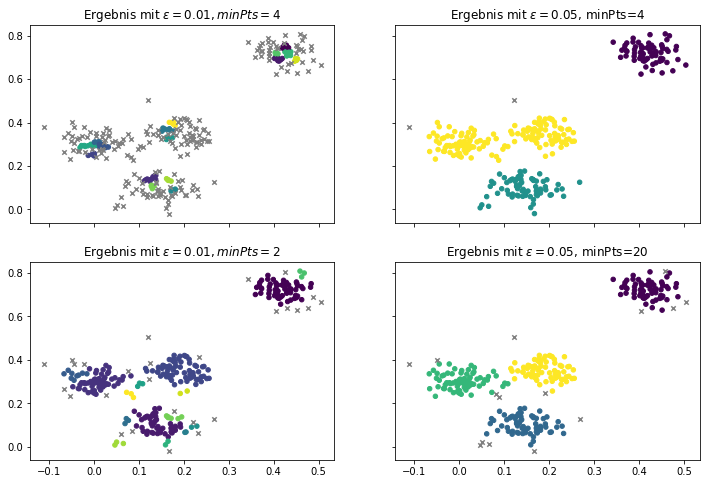

In [2]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

dbscan = DBSCAN(eps=0.01, min_samples=4)
dbscan.fit(X)
noise_mask = dbscan.labels_<0
axes[0,0].set_title('Ergebnis mit $\epsilon=0.01, minPts=4$')
axes[0,0].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[0,0].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')

dbscan = DBSCAN(eps=0.05, min_samples=4)
dbscan.fit(X)
noise_mask = dbscan.labels_<0

axes[0,1].set_title('Ergebnis mit $\epsilon=0.05$, minPts=4')
axes[0,1].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[0,1].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')

dbscan = DBSCAN(eps=0.02, min_samples=2)
dbscan.fit(X)
noise_mask = dbscan.labels_<0
axes[1,0].set_title('Ergebnis mit $\epsilon=0.01, minPts=2$')
axes[1,0].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[1,0].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')

dbscan = DBSCAN(eps=0.05, min_samples=20)
dbscan.fit(X)
noise_mask = dbscan.labels_<0

axes[1,1].set_title('Ergebnis mit $\epsilon=0.05$, minPts=20')
axes[1,1].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[1,1].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')
plt.show()

In der ersten Spalte sehen wir Ergebnisse für sehr kleine Werte von $\epsilon$ mit 0,01. Wenn man die $minPts$ bei 4 belässt, findet man keine echten Cluster mehr. Es gibt zwar einige wenige Instanzen, die noch als Kernpunkte erkannt werden, die meisten Instanzen sind jedoch Rauschen. Wenn man $minPts$ auf 2 reduziert, wird das Ergebnis besser. Es gibt vier größere Cluster, die ähnlich zu unserem Beispielergebnis weiter oben sind. Es gibt jedoch noch viele sehr kleine Cluster, die nur drei Instanzen beinhalten. Das ist nicht wünschenswert: Diese kleinen Cluster sollten entweder zu größeren Clustern gehören oder als Rauschen erkannt werden. In der zweiten Spalte sehen wir, was passiert, wenn wir ein relativ großes $\epsilon$von 0,05 wählen. Die Ergebnisse sehen besser aus als mit dem kleinen Epsilon. Wenn wir die $minPts$ bei 4 belassen, finden wir drei große Cluster, die dem Ergebnis vom $k$-Means- und EM-Clustering mit drei Clustern entsprechen. Wenn wir die $minPts$ auf 20 erhöhen, haben wir weniger Kernpunkte, die stattdessen große Nachbarschaften aufweisen. Das führt zu einem ähnlichen Ergebnis wie mit unserer ursprünglichen Parameterwahl von $\epsilon=0,03$ und $minPts=4$, jedoch mit weniger Rauschen.

Im Allgemeinen ist es so, dass man mit einem kleinen $\epsilon$ die Wahrscheinlichkeit für viel Rauschen oder sehr kleine Cluster erhöht. Wenn man ein größeres  $\epsilon$ wählt, führt dies dazu, dass Cluster verschmolzen werden. Wenn man $minPts$ reduziert, bekommt man mehr Kernpunkte, was dazu führt, dass Brücken zwischen Clustern entstehen und diese zusammengeführt werden oder auch dass sehr kleine Cluster möglich werden. Wenn man $minPts$ erhöht, kann man kleine Cluster vermeiden, es könnte aber auch viel Rauschen geben, wenn $\epsilon$ zu klein gewählt wird. Das Zusammenspiel der Parameter ist also relativ komplex und es gibt keine einfache Faustregel, um gute Werte zu bestimmen.

Es gibt jedoch ein analytisches Werkzeug, mit dessen Hilfe man gute Kombinationen von $\epsilon$ und $minPts$ ermitteln kann. Hierzu nutzt man den Abstand des $k$*-ten nächsten Nachbarn* (engl. $k$-th *nearest neighbor*) einer Instanz, um zu sehen, wie viele Kernpunkte es bei einer Parameterkombination gibt.

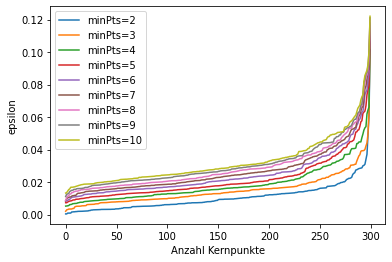

In [7]:
from sklearn.neighbors import NearestNeighbors

# we use sklearn to find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
    
plt.ylabel('epsilon')
plt.xlabel('Anzahl Kernpunkte')
plt.legend()
plt.show()

Gute Parameter findet man in dem Bereich, in dem die Kurve stark gekrümmt ist. Für die Kurve von $minPts=4$ ist das zum Beispiel im Bereich zwischen 0,03 und 0,04 $\epsilon$ der Fall. 

### Probleme bei DBSCAN

Bei DBSCAN muss man weder die Anzahl der Cluster auswählen, noch gibt es Einschränkungen bezüglich der Form der Cluster. Trotzdem gibt es auch bei diesem Algorithmus verschiedene Probleme, die man berücksichtigen sollte.

- Das größte Problem ist die Wahl von $\epsilon$ und $minPts$. Insbesondere wenn es Gruppen gibt, die sehr nah beieinander liegen, oder die Daten insgesamt sehr dicht sind, kann es schwierig sein, sinnvolle Parameter und Cluster zu finden. Der Grund dafür liegt darin, dass in diesem Fall einige Datenpunkte zu *Brückenpunkten* (engl. *bridge points*) zwischen zwei Clustern werden können. Man spricht von Brückenpunkten, wenn es Kernpunkte gibt, die dafür sorgen, dass zwei Cluster verschmelzen. Um dies zu verhindern, muss man große Werte für  wählen, damit es keine Kernpunkte in der Grenzregion eines Clusters gibt. Dies führt aber auch dazu, dass man $\epsilon$ relativ groß wählen muss, was wieder zu neuen Problemen führen kann.
- Ein weiteres Problem sind Gruppierungen mit unterschiedlichen Dichten. Im folgenden Beispiel sollen zwei kreisförmige Gruppen geclustert werden. Mit 100 Instanzen pro Kreis sind die Daten des äußeren Kreises aufgrund des größeren Umfangs nicht sehr dicht im Verhältnis zum inneren Kreis. Daher gibt es einige Stellen ohne Kernpunkte, sodass mehrere kleinere Cluster im äußeren Kreis entstehen. Wenn man die Anzahl der Instanzen erhöht, werden beide Kreise korrekt geclustert.

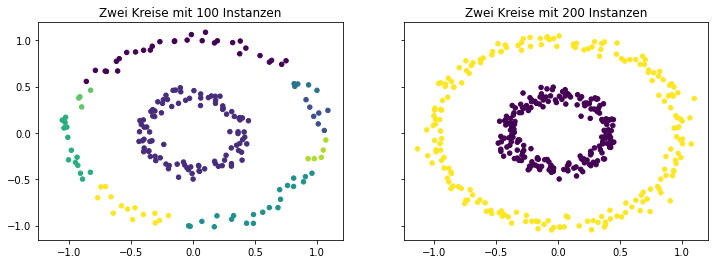

In [3]:
from sklearn.datasets import make_circles

f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))

X, _ = make_circles(n_samples=200, noise=0.05, factor=0.4, random_state=1)
dbscan = DBSCAN(eps=0.15, min_samples=4)
dbscan.fit(X)
noise_mask = dbscan.labels_<0
axes[0].set_title('Zwei Kreise mit 100 Instanzen')
axes[0].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[0].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')

X, _ = make_circles(n_samples=400, noise=0.05, factor=0.4, random_state=1)
dbscan = DBSCAN(eps=0.15, min_samples=4)
dbscan.fit(X)
noise_mask = dbscan.labels_<0
axes[1].set_title('Zwei Kreise mit 200 Instanzen')
axes[1].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[1].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')
plt.show()

- Da die Dichte der Daten wichtig für die Wahl von $\epsilon$ und $minPts$ ist, folgt auch, dass man DBSCAN nicht ohne Weiteres auf eine zufällige Teilmenge der Daten anwenden kann, ohne die Parameter anzupassen. Der Grund hierfür ist, dass eine Teilmenge in der Regel eine geringere Dichte hat. 
- Da DBSCAN ähnlich wie $k$-Means die Cluster basierend auf Distanzen bestimmt, ist der Algorithmus ebenfalls anfällig für Skaleneffekte, wenn Merkmale verschiedene Größenordnungen haben. 

## Single Linkage Clustering

Ein wichtiger Mechanismus, wie Städte wachsen, ist der Zusammenschluss mit anderen Städten und Gemeinden. Dies passiert natürlich nicht beliebig, sondern mit Städten, die ohnehin sehr nah beieinander liegen. Das ist die Grundidee vom *hierarchischen Clustern*. Die Idee ist ähnlich wie bei DBSCAN, nur dass wir nicht mit dichten Nachbarschaften arbeiten, sondern stattdessen kleine Cluster zu größeren Clustern zusammenfügen. Als Ergebnis hat man daher sehr viele verschiedene mögliche Clusterergebnisse, da das Zusammenfügen durchgeführt wird, bis alle Instanzen zu einem einzigen Cluster verschmolzen sind. Anschließend wählt man von diesen vielen Ergebnissen ein passendes aus. Das Endergebnis sieht dann zum Beispiel wie folgt aus.

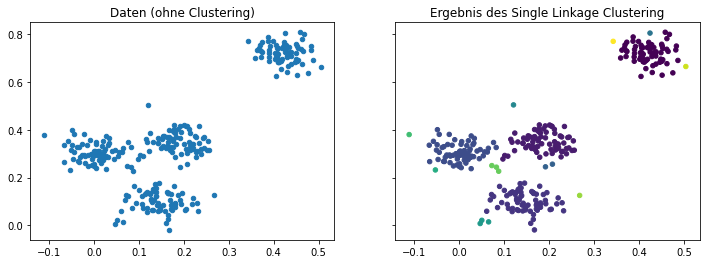

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

eps = 0.03

X, y_true = make_blobs(n_samples=300, centers=4, center_box=(0,1),
                       cluster_std=0.04, random_state=1)

sl = AgglomerativeClustering(n_clusters=None,distance_threshold=0.03,linkage='single', compute_full_tree=True)
sl.fit(X)
y_sl = sl.labels_

f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))
axes[0].set_title('Daten (ohne Clustering)')
axes[0].scatter(X[:, 0], X[:, 1], s=20);
axes[1].set_title('Ergebnis des Single Linkage Clustering')
axes[1].scatter(X[:, 0], X[:, 1], c=y_sl, s=20)
plt.show()

Das Ergebnis sieht ähnlich aus wie bei DBSCAN, es gibt jedoch einen großen Unterschied: Es entsteht kein Rauschen, stattdessen kommt es zu einigen sehr kleinen Clustern, die zum Teil sogar nur aus einer Instanz bestehen, zum Beispiel am linken Rand.

Es gibt verschiedene hierarchische Clusteralgorithmen, die sich darin unterscheiden, wie die Cluster zusammengefügt werden. Darunter sind auch Algorithmen, die genau andersrum vorgehen und ein großes Cluster schrittweise in kleine Cluster zerlegen, zum Beispiel das *Complete Linkage Clustering*. Im Folgenden betrachten wir das *Single Linkage Clustering* (SLINK) als Beispiel für einen hierarchischen Clusteralgorithmus.

### Der SLINK-Algorithmus

SLINK ist ein iterativer Algorithmus, der in jedem Schritt die zwei Cluster mit dem geringsten Abstand voneinander zu einem neuen Cluster zusammenfügt. Zu Beginn ist jede Instanz in einem eigenen Cluster. SLINK berechnet dann die Distanzen für zwei Cluster $C$ und $C'$ als die Distanz zwischen den Instanzen der jeweiligen Cluster, die sich am nächsten liegen, also

$$d(C, C') = \min_{x\in C, x' \in X'} dist(x, x').$$

Für jedes Cluster, das beim Zusammenfügen erstellt wird, berechnet SLINK ein *Level*. Das Level gibt an, wie weit die Cluster, die verbunden wurden, voneinander getrennt waren. Man kann sich das als den Abstand zwischen zwei Städten, die zu einer Stadt verbunden werden, vorstellen. Ein niedriges Level heißt also, dass zwei Cluster, die verbunden wurden, nah beieinander lagen, ein hohes Level heißt, dass es eine größere Lücke zwischen den Clustern gab. Diese Lücke ist dann automatisch auch Teil des größeren Clusters.

Basierend auf dieser Idee ist der eigentlich Algorithmus relativ einfach:

1. Initialisiere die Basiscluster $C = \{x\}$ für alle $x \in X$ mit Level $L(C) = 0$.
2. Finde die zwei Cluster, deren Abstand minimal ist, also $C, C' = \arg\min_{C, C'} d(C,C')$.
3. Verbinde $C$ und $C'$ zu einem neuen Cluster $C_{new} = C \cup C'$ mit Level $L(C_{new}) = d(C, C')$.
4. Wiederhole die Schritte 2 und 3, bis alle Instanzen in einem Cluster sind. 

Das Ergebnis dieses Algorithmus ist also kein eindeutiges Clustering, sondern sehr viele mögliche Ergebnisse. Diese kann man sich am besten durch ein *Dendrogramm* veranschaulichen. 

### Dendrogramme

Ein *Dendrogramm* ist die visuelle Darstellung einer Baumstruktur als Graph. Für unser Beispiel bekommen wir folgendes Dendrogramm. 

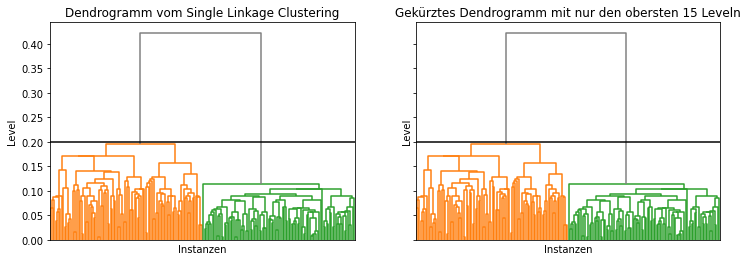

In [6]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

f, axes = plt.subplots(1, 2, sharey=True, sharex=False, figsize=(12, 4))
axes[0].set_title("Dendrogramm vom Single Linkage Clustering")
axes[0].set_ylabel("Level")
axes[0].set_xlabel("Instanzen")
plot_dendrogram(sl,color_threshold=eps, no_labels=True, above_threshold_color='grey', ax=axes[0])
axes[0].axhline(y=eps, c='k')

axes[1].set_title("Gekürztes Dendrogramm mit nur den obersten 15 Leveln")
axes[1].set_ylabel("Level")
axes[1].set_xlabel("Instanzen")
plot_dendrogram(sl,color_threshold=eps, no_labels=True, above_threshold_color='grey', p=15, truncate_mode='level', ax=axes[1])
axes[1].axhline(y=eps, c='k')
plt.show()

Am unteren Rand des Dendrogramms sind unsere Instanzen, was gleichbedeutend ist mit den Clustern mit Level null. Jede horizontale Linie verbindet zwei Cluster zu einem neuen Cluster. Die Lage dieser Linie auf der y-Achse ist das Level des neuen Clusters, das durch die Verbindung entsteht. Die horizontale Linie bei 0,1 verbindet zum Beispiel alle Instanzen in den Clustern des linken Teilbaums mit den Instanzen im rechten Teilbaum zu einem neuen Cluster mit Level 0,1. Aufgrund der Definition des Levels wissen wir, dass alle Instanzen im linken Teilbaum mindestens eine Distanz von 0,1 zu allen Instanzen im rechten Teilbaum haben. Außerdem ist noch eine schwarze horizontale Linie bei 0,03 eingezeichnet. Diese Linie markiert die Clusterauswahl, für die wir uns im Beispiel weiter oben entschieden haben.

Die linke Grafik ist sehr dicht am unteren Rand, sodass man eigentlich nur noch größere gleichfarbige Regionen erkennt. Dies liegt daran, dass jede einzelne Instanz eine kleine Linie am unteren Rand darstellt, in unserem Fall gibt es daher 300 solche Linien. Ein einfacher Trick, mit dem man auch den unteren Bereich eines Dendrogramms besser darstellen kann, ist es, die unteren Ebenen des Baums wegzulassen. Man zeigt also nicht die Cluster aller Level, sondern nur die Cluster der höchsten Level. Die rechte Grafik stellt zum Beispiel nur die obersten 15 Level dar. Hierdurch sieht man zwar die Instanzen am unteren Rand nicht mehr, kann aber dafür die Abstände zwischen den kleineren Clustern in diesem Bereich besser erkennen.

Auch wenn Dendrogramme als Visualisierung zunächst etwas gewöhnungsbedürftig sind, handelt es sich um ein hervorragendes Werkzeug, um visuell geeignete Cluster auszuwählen. Im obigen Beispiel haben wir einen festen Grenzwert von 0,03 verwendet, um die Cluster anhand der Level auszuwählen. Im Dendrogramm kann man direkt erkennen, was zum Beispiel passieren würde, wenn wir stattdessen einen Grenzwert von 0,05 wählen würden: Das grüne und das braune Cluster wären dann zusammen in einem Cluster. Wenn man den Grenzwert zwischen 0,06 und 0,26 wählen würde, hätte man zwei Cluster. Für Werte zwischen 0,06 und 0,1 hätte man eigentlich auch schon nur noch zwei große Cluster, es gäbe jedoch formal noch ein weiteres Cluster mit einer einzigen Instanz. Insgesamt erkennt man die Auswirkungen des Grenzwerts ,den man wählt, deutlich besser als beim ähnlichen DBSCAN-Algorithmus, wo die Auswirkungen unterschiedlicher Werte von $\epsilon$ und $minPts$ nicht einfach vorherzusagen sind.

### Probleme bei SLINK

Wie alle Algorithmen, ist auch SLINK nicht ohne Probleme. 

- Das größte Problem bei SLINK (und beim hierarchischen Clustern im Allgemeinen) ist die Skalierbarkeit für größere Datensätze. Da die Algorithmen in der Regel erfordern, dass man eine quadratische Distanzmatrix berechnet, in der die Distanzen zwischen allen Instanzen gespeichert werden, ist insbesondere der Speicherbedarf problematisch. Bei 100.000 Instanzen wären dies zum Beispiel bereits etwa 4 Gigabyte, selbst wenn man die Symmetrie ausnutzt und nur das obere Dreieck der Distanzmatrix speichert. Daher können hierarchische Clusteralgorithmen in der Regel nur bei kleinen Datensätzen angewandt werden.
- Ebenso wie beim DBSCAN-Algorithmus sind Bereiche mit unterschiedlichen Dichten problematisch. Es ist jedoch einfacher, einen guten Grenzwert zu bestimmen, mit dem man die Cluster trennen kann. Hier hilft das Dendrogramm. Im Beispiel mit den Kreisen erkennt man zum Beispiel, dass man für Grenzwerte zwischen 0,2 und 0,4 das richtige Ergebnis findet.

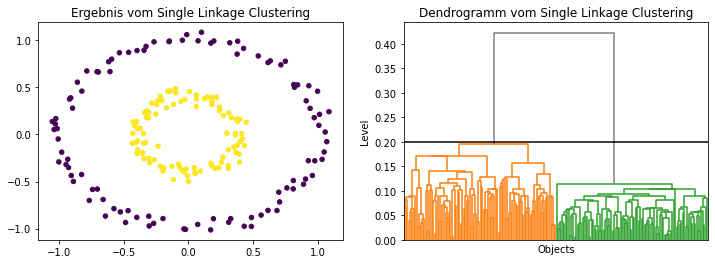

In [7]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=200, noise=0.05, factor=0.4, random_state=1)

eps=0.2

sl = AgglomerativeClustering(n_clusters=None,distance_threshold=eps,linkage='single', compute_full_tree=True)
sl.fit(X)
y_sl = sl.labels_

f, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('Ergebnis vom Single Linkage Clustering')
axes[0].scatter(X[:, 0], X[:, 1], c=y_sl, s=20)

axes[1].set_title('Dendrogramm vom Single Linkage Clustering')
axes[1].set_ylabel('Level')
axes[1].set_xlabel('Objects')
plot_dendrogram(sl,color_threshold=eps, no_labels=True, above_threshold_color='grey', ax=axes[1])
axes[1].axhline(y=eps, c='k')
plt.show()

- Ein weiteres Problem, das wir bereits von DBSCAN kennen, sind Brückenpunkte, die Cluster verbinden. Der Grund dafür ist, dass DBSCAN und SLINK die gleichen Cluster liefern, wenn man $minPts=1$ setzt. Der Grenzwert für die Level ist dann von der Bedeutung identisch zum $\epsilon$ von DBSCAN. Brückenpunkte sind bei SLINK sogar ein noch größeres Problem. Während man bei DBSCAN durch einen hohen Wert für minPts versuchen kann, zu verhindern, dass die Brückenpunkte zu Kernpunkten werden, ist dies bei SLINK nicht möglich.
- SLINK kann zu vielen sehr kleinen Clustern führen, da jede Instanz initial einem eigenen Cluster zugewiesen wird, und sich dies, je nach Grenzwert, möglicherweise auch im Endergebnis nicht ändert. Ausreißer führen daher dazu, dass es viele Cluster gibt, die irrelevant sind, aber die Analyse erschweren.
- Da SLINK auch distanzbasiert ist, ist der Algorithmus weiter anfällig für Skaleneffekte durch unterschiedliche Wertebereiche, wie wir es beim $k$-Means-Algorithmus beschrieben haben.

## Vergleich der Algorithmen

Während der Beschreibung haben wir immer wieder einzelne Aspekte der Algorithmen miteinander verglichen, insbesondere wenn es ähnliche Probleme gab oder wenn ein Algorithmus ein Problem geschickt umgangen hat. Im letzten Teil dieses Kapitels wollen wir verschiedene Eigenschaften der Algorithmen direkt miteinander vergleichen.

### Clusterformen

Die wohl wichtigste Eigenschaft der Algorithmen ist es, Cluster richtig zu erkennen. Hierbei spielt insbesondere die Form der Cluster eine Rolle, wie wir schon am Beispiel der Kreise und der Halbmonde gesehen haben. 

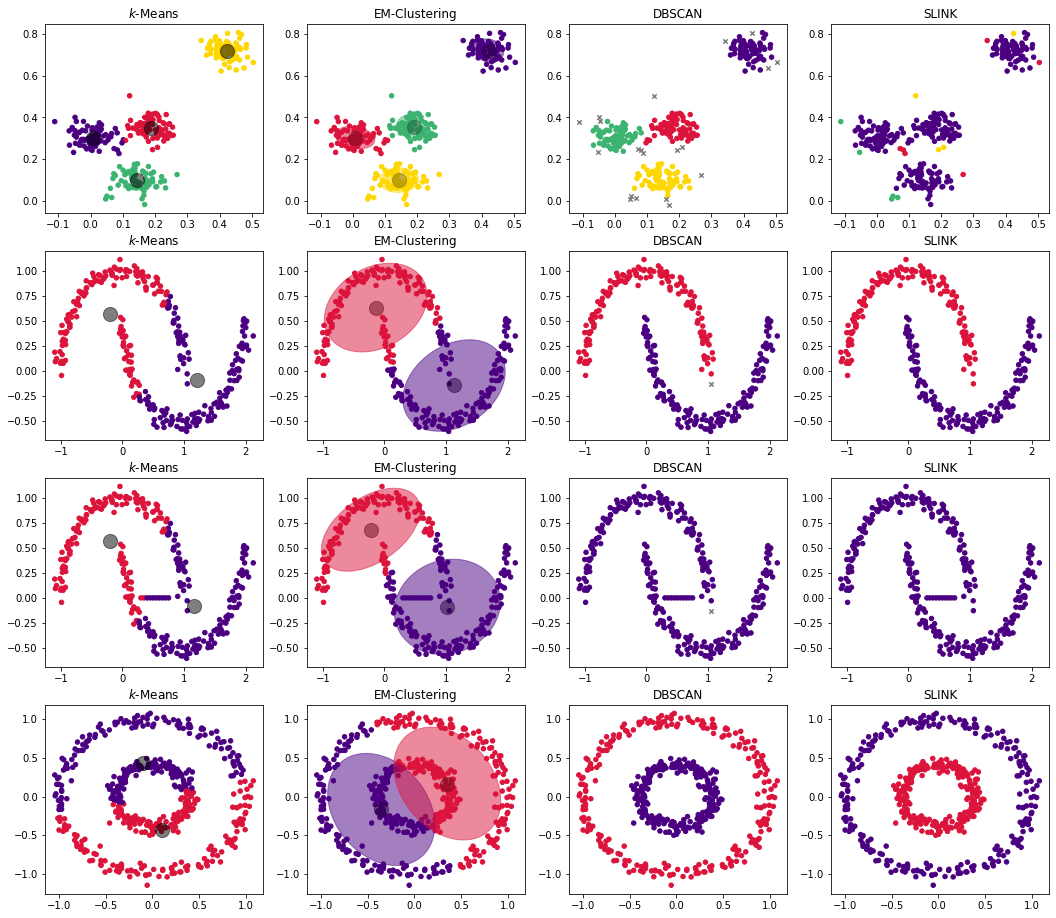

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap

datasets = [make_blobs(n_samples=300, centers=4, center_box=(0,1),cluster_std=0.04, random_state=1),
            make_moons(n_samples=300, noise=0.05, random_state=0),
            (np.append(make_moons(n_samples=300, noise=0.05, random_state=0)[0], [[0.3,0],[0.35,0], [0.4,0], [0.45,0], [0.5,0], [0.55,0], [0.6,0], [0.65,0], [0.7,0], [0.75,0]], axis=0),None),
            make_circles(n_samples=500, noise=0.05, factor=0.4, random_state=1)]

# parameter values for the different data sets
k = [4,2,2,2]
eps = [0.03,0.15,0.15,0.15]

f, axes = plt.subplots(4, 4, figsize=(18, 16))

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    
    colors = ['indigo', 'gold', 'mediumseagreen', 'crimson']
    
    cmap = ListedColormap(colors, name="cmap_points")
    colors = ['indigo', 'crimson', 'mediumseagreen', 'gold']
    
    kmeans = KMeans(n_clusters=k[ds_cnt], random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    
    ax = axes[ds_cnt, 0]
    ax.set_title('$k$-Means')
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap=cmap)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    
    dbscan = DBSCAN(eps=eps[ds_cnt], min_samples=4)
    dbscan.fit(X)
    noise_mask = dbscan.labels_<0
    
    ax = axes[ds_cnt, 2]
    ax.set_title('DBSCAN')
    ax.scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20, cmap=cmap)
    ax.scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')
    
    em = GaussianMixture(n_components=k[ds_cnt],random_state=0)
    em.fit(X)
    y_em = em.predict(X)
    centers = em.means_
    
    ax = axes[ds_cnt, 1]
    ax.set_title('EM-Clustering')
    ax.scatter(X[:, 0], X[:, 1], c=[colors[y] for y in y_em], s=20, cmap=cmap)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    for n, color in enumerate(colors[:k[ds_cnt]]):
        v, w = np.linalg.eigh(em.covariances_[n][:2,:2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(em.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        
    sl = AgglomerativeClustering(n_clusters=None,distance_threshold=eps[ds_cnt],linkage='single', compute_full_tree=True)
    sl.fit(X)
    y_sl = sl.labels_

    ax = axes[ds_cnt, 3]
    ax.set_title('SLINK')
    ax.scatter(X[:, 0], X[:, 1], c=y_sl, s=20, cmap=cmap)
plt.show()

Wie man sieht, liefern alle Algorithmen auf unserem Beispieldatensatz gute Ergebnisse. Im Detail erkennt man jedoch auch hier Unterschiede, insbesondere dort, wo die Cluster nah beieinander liegen. An der Grenze zwischen den beiden Clustern im mittleren Bereich sieht man eine scheinbar zufällige Trennung bei $k$-Means und EM Clustering, Rauschen bei DBSCAN, und einige kleine Cluster bei SLINK.

In der zweiten Zeile sehen wir noch einmal die Halbmonde. Hier erkennt man gut, was wir oben bereits beschrieben haben: $k$-Means und EM- Clustering sind für solche geometrische Formen nicht geeignet, da sie von einer eher runden bzw. ellipsoiden Form ausgehen. Da DBSCAN und SLINK stattdessen die direkten Nachbarschaften zwischen den Instanzen betrachten, sind solche Daten für diese Algorithmen kein Problem. Im Allgemeinen funktionieren diese Algorithmen mit beliebigen geometrischen Formen, wichtig ist nur, dass es Lücken zwischen den Clustern gibt. Dass dies ein Problem sein kann, zeigt die dritte Reihe. Hier haben wir einige Brückenpunkte hinzugefügt, sodass die Algorithmen nicht mehr zwischen den Clustern unterscheiden können.

Die vierte Reihe zeigt, dass auch runde Clusterformen bei $k$-Means und EM-Clustering möglicherweise zu Problemen führen, nämlich dann, wenn es sich um ineinander liegende Kreise handelt.

### Anzahl der Cluster

Eine weitere Stärke von DBSCAN und SLINK besteht darin, dass man die Anzahl der Cluster nicht vorgeben muss, sondern sich diese automatisch aufgrund der Dichte der Daten und der gewählten Parameter ergibt. Beim EM-Clustering gibt es mit dem BIC ein analytisches Kriterium, mit dem man das Optimum bestimmen kann. Bei $k$-Means ist eine manuelle Analyse zwingend erforderlich, zum Beispiel mit der WSS. Hier gibt es kein hartes Kriterium, anhand dessen man einen guten Wert für $k$ aus dem Liniendiagramm der WSS ablesen kann, stattdessen ist die Erfahrung gefragt, um relevante Änderungen in der Steigung zu erkennen.

### Ausführungszeit

Die Ausführungszeit kann, je nach Größe des Datensatzes und Anwendungsfall, ein entscheidendes Kriterium bei der Wahl des Algorithmus sein. Unten sieht man die Ergebnisse der Ausführungszeit für das Clustern von Daten mit 20 Merkmalen für 10.000, 100.000, 1.000.000, 10.000.000 und 100.000.000 Instanzen, also für bis zu 15 Gigabyte Daten. SLINK fehlt im Vergleich, da dieser Algorithmus bereits bei 100.000 Instanzen aus den oben beschriebenen Problemen mit dem Platzbedarf nicht mehr korrekt arbeitet. Die Zeiten wurden mit einem normalen Laptop (Intel Core i7-8850 @ 2.60GHz, 32 GB RAM) mit scikit-learn 0.24 ermittelt.

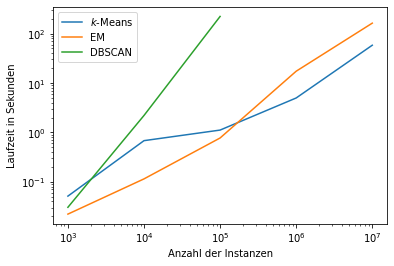

In [13]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture

import timeit

names = ["$k$-Means",
         "EM",
         "DBSCAN"]

clusters = [
    KMeans(n_clusters=4, random_state=0),
    GaussianMixture(n_components=4,random_state=0, warm_start=False),
    DBSCAN(eps=0.01, min_samples=4)]

instances = [1e3,1e4,1e5,1e6,1e7]
runtime = [[],[],[]]
for num_instances in instances:
    X, _ = make_blobs(n_samples=int(num_instances), centers=4, center_box=(0,1),cluster_std=0.04, random_state=1, n_features=20)
    X = StandardScaler().fit_transform(X)
    for cl_cnt, cl in enumerate(clusters):
        if cl_cnt==2 and num_instances>100000:
            # we skip DBSCAN here, because this takes requires a long time and the trend is already visible
            continue
        start_time = timeit.default_timer()
        cl.fit(X)
        elapsed = timeit.default_timer() - start_time
        runtime[cl_cnt].append(elapsed)
        
fix, ax = plt.subplots()
ax.plot(instances, runtime[0], label=names[0])
ax.plot(instances, runtime[1], label=names[1])
ax.plot(instances[:len(runtime[2])], runtime[2], label=names[2])
ax.set_xticks(instances)
ax.set_ylabel('Laufzeit in Sekunden')
ax.set_xlabel('Anzahl der Instanzen')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()
plt.show()

Wie man sieht, ist die Laufzeit des $k$-Mean und des EM-Algorithmus ähnlich, DBSCAN ist langsamer. Dies liegt daran, dass es bei vielen Instanzen möglicherweise sehr große Nachbarschaften gibt, was sich negativ auf die benötigte Rechenzeit von DBSCAN auswirkt. Die Laufzeitmessungen hängen aber auch von den Daten ab. Wenn die Daten besonders dünn (engl. *sparse*) oder dicht sind oder es eine seltsame Verteilung gibt, kann sich dies auf die Laufzeiten auswirken. Im Allgemeinen ist die Laufzeit aber ein sekundärer Aspekt bei der Auswahl eines geeigneten Clusteralgorithmus, es sei denn, man hat extrem viele Instanzen.

### Interpretierbarkeit und Darstellung

Ein großer Vorteil des $k$-Means und des EM-Clustering ist, dass diese Verfahren eine gut interpretierbare und kompakte mathematische Beschreibung der Cluster liefern, indem die Cluster durch die Centroids bzw. Normalverteilungen beschrieben werden. Dies liefert uns ein mächtiges Werkzeug, um die Bedeutung der Cluster zu verstehen. Außerdem ist es hierdurch möglich, unabhängig von den anderen Daten zu bestimmen, zu welchem Cluster eine Instanz gehört. Hierdurch lassen sich die Ergebnisse problemlos auf anderen Systemen einsetzen, wo die Daten selbst nicht zur Verfügung stehen.

DBSCAN und SLINK habe keine vergleichbare Darstellung. Stattdessen sind hier die Instanzen selbst die Beschreibung der Cluster. Hierdurch kann man die Ergebnisse nur visuell interpretieren, was gerade bei hochdimensionalen Daten äußert schwierig ist. SLINK ist für die Interpretation durch die Dendrogramme etwas besser, da man zumindest relativ einfach beurteilen kann, wie groß die Abstände zwischen den Instanzen bzw. den Clustern sind.

### Kategorische Merkmale

Kategorische Merkmale sind ein Problem für alle Algorithmen, die wir betrachtet haben. Sowohl $k$-Means als auch DBSCAN und SLINK berechnen Distanzen. Da man per Definition keine sinnvollen Distanzen zwischen zwei Kategorien ermitteln kann, kann man auch keine sinnvollen Distanzen zwischen Instanzen mit kategorischen Daten berechnen. Im Fall von $k$-Means gibt es eine Variante namens $k$-Modes, bei der die Centroids durch den Modus der Daten im Cluster berechnet werden. Beim EM-Clustering geht die Normalverteilung von einem kontinuierlichen Wertebereich aus, was bei kategorischen Daten nicht der Fall ist. Die Lösung hier besteht darin, keine Normalverteilung für die Beschreibung der Cluster zu verwenden, sondern stattdessen den EM-Algorithmus mit einer besser passenden Verteilung zu benutzen, zum Beispiel einer Multinomialverteilung.

### Fehlende Merkmale

In der Praxis kommt es häufig vor, dass es Instanzen gibt, bei denen nicht die Werte für alle Merkmale bekannt sind. Man spricht hier von fehlenden Werten bzw. fehlenden Merkmalen. Es gibt drei Möglichkeiten, mit fehlenden Merkmalen umzugehen: Entweder kann der Algorithmus von sich aus mit unvollständigen Daten arbeiten. Dies ist, bis auf wenige Ausnahmen, nicht der Fall. Die zweite Möglichkeit besteht darin, alle unvollständigen Instanzen zu entfernen. Hier hat man jedoch möglicherweise in der Operationalisierung ein Problem. Als dritte Möglichkeit kann man durch *Imputation* eine Schätzung für die fehlenden Werte berechnen, zum Beispiel durch eine Regression basierend auf den vorhandenen Daten. Details zur Imputation finden Sie in der Literatur, zum Beispiel bei Barnard und Meng [^barnard].

### Korrelierte Merkmale

Korrelierte Merkmale sind für alle betrachteten Algorithmen problematisch, insbesondere die Algorithmen $k$-Means, DBSCAN und SLINK, die Distanzen berechnen, haben hierdurch ein Problem mit Korrelationen. Um dies zu verdeutlichen, betrachten wir einen extremen Fall: Nehmen wir an, es gebe zwei Merkmale, das normalisierte Alter in Jahren und das normalisierte Alter in Tagen. Man spricht von einem Merkmal als *normalisiert* (bzw. *normiert*), wenn die Werte auf das Intervall $[0,1]$  reskaliert wurden. Die Werte dieser beiden Features wären nicht identisch, da das Alter in Tagen feingranularer ist als das Alter in Jahren. Die Bedeutung und der Informationsgehalt wären jedoch nahezu identisch, sodass es faktisch das Merkmal "normalisiertes Alter" zwei Mal geben würde. Das heißt auch, dass das Alter doppelt in die Distanzberechnung einfließt und dementsprechend einen überproportionalen Einfluss auf die Distanz hätte. Je mehr und je stärker die Korrelationen in den Daten sind, desto ausgeprägter ist der negative Effekt auf die Distanzberechnungen.

Das EM-Clustering ist robuster gegenüber Korrelationen, da diese durch die Kovarianzen berücksichtigt werden können. Da man jedoch möglicherweise mehr Merkmale als benötigt hat, wirken sich Korrelationen auf die Berechnung des BIC aus, weshalb man eventuell eine zu kleine Anzahl an Clustern auswählt, da die Komplexität des Ergebnisses überschätzt wird.

### Zusammenfassung des Vergleichs

{numref}`tbl-cluster1` und {numref}`tbl-cluster2` fassen die Stärken und Schwächen der Clusteralgorithmen noch einmal zusammen. 

```{table} Zusammenfassung der Vor- und Nachteile der Clusteralgorithmen (1/2)
:name: tbl-cluster1

|  []()         | Clusterform | Clusteranzahl | Laufzeit | Interpretierbarkeit | Darstellung | 
|---------------|-------------|---------------|----------|---------------------|-------------|
| $k$-Means     | $-$         | $-$           | o        | $+$                 | $+$         |
| EM-Clustering | o           | o             | o        | $+$                 | $+$         |
| DBSCAN        | $+$         | $+$           | o        | $-$                 | $-$         |
| SLINK         | $+$         | o             | o (\*)   | $+$                 | $-$         |
```

```{table} Zusammenfassung der Vor- und Nachteile der Clusteralgorithmen (2/2)
:name: tbl-cluster2

|  []()         | Kategorische Merkmale | Fehlende Merkmale | Korrelierte Merkmale |
|---------------|-----------------------|-------------------|----------------------|
| $k$-Means     | $-$                   | $-$               | $-$                  |
| EM-Clustering | $-$                   | $-$               | o                    |
| DBSCAN        | $-$                   | $-$               | $-$                  |
| SLINK         | $-$                   | $-$               | $-$                  |
```

[^barnard]: https://doi.org/10.1177%2F096228029900800103

## Übung

In dieser Übung wollen wir das Clustering vertiefen. Das Ziel ist es, die Parameterauswahl und die Interpretation der Cluster bei hochdimensionalen Daten zu üben. Die Interpretation ist auch die größte Schwierigkeit dieser Übung.
Als Daten verwenden wir die Bostondaten. Hier noch ein paar Tipps vorweg:

- Denken Sie an die Wertebereiche der Merkmale. Diese könnten einen Einfluss auf die Ergebnisse haben.
- Durch die Dimensionalität ist es schwierig, die Cluster zu interpretieren. Setzen Sie die PCA und paarweise Scatterplots ein (siehe [Kapitel 4](kapitel_04)). Beide haben gewisse Vor- und Nachteile, auf die Sie hier auch achten können.

In jedem der folgenden Aufgabenteile sollten Sie probieren, die Bedeutung jedes Clusters zu bestimmen, also eine Beschreibung der Instanzen, die gemeinsam gruppiert werden, als eine Art Gruppenname.

### $k$-Means-Algorithmus

Benutzen Sie den $k$-Means-Algorithmus, um die Daten zu clustern. Bestimmen Sie eine geeignete Clusteranzahl $k$. Benutzen Sie Ihr Wissen über die Daten, Visualisierungen und WSS, um eine geeignete Anzahl Cluster zu bestimmen.

### EM Clustering

Benutzen Sie das EM-Clustering, um die Daten zu clustern. Bestimmen Sie eine geeignete Clusteranzahl $k$. Benutzen Sie Ihr Wissen über die Daten, Visualisierungen und BIC, um eine geeignete Anzahl Cluster zu bestimmen.

### DBSCAN

Benutzen Sie DBSCAN, um die Daten zu clustern. Bestimmen Sie geeignete Werte für $\epsilon$ und $minPts$. Benutzen Sie Ihr Wissen über die Daten und Visualisierungen, um geeignete Werte zu finden.

### SLINK

Benutzen Sie den SLINK-Algorithmus, um die Daten zu clustern. Bestimmen Sie mithilfe eines Dendrogramms einen geeigneten Grenzwert für die Level.

### Vergleichen Sie die Ergebnisse

Vergleichen Sie die Ergebnisse der Algorithmen. Welche Unterschiede gibt es zum Beispiel in der Clusteranzahl und der Form der Cluster? Identifizieren Sie eventuelle Probleme der Algorithmen. 